<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-b23/blob/main/5_1_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Boosting


In diesem Notebook tranieren wir ein Gradient Boosting Modell auf unsere Daten

Leonie

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#Modell 1

In [ ]:
df = pd.read_csv('Daten_kodiert_fuer_modelle_dummycodierung_V6.csv')

In [ ]:
df

character  \
0     Oh Joon-woo, Kim Yoo-bin, Sang-chul, Elena Kim...   
1                            Narrator, Self, Self, Self   
2     Ditto, Ayu, Darma, Mili, Dila, Rifnu, Aca, Iqb...   
3     Ditto, Ayu, Ayu's Mother, Ditto's Mother, Ditt...   
4     Dani Barnes, Cameron Drake, Alexa Medina, Fred...   
...                                                 ...   
3945  Doujima Daisuke (voice), Milo (voice), Chang L...   
3946  Jonathan Larson, Susan Wilson, Michael, Karess...   
3947  Segundo, María, Rossi de la Vega, Carla, Pili,...   
3948  Titi, Peju, Emeka, Beauty, Tony, Sheriff, Simo...   
3949  Chen Xin-Tian (Candy), Lin Jia-Qi, Jian Da-Che...   

                                            description  runtime  imdb_votes  \
0     As a grisly virus rampages a city, a lone man ...     98.0     38313.0   
1     One single Anne Frank moves us more than the c...     92.0      1548.0   
2     Pining for his high school crush for years, a ...    102.0       714.0   
3     As Ayu and Ditto finally transition from best ...    104.0       311.0   
4     When nerdy high schooler Dani finally attracts...     99.0      6357.0   
...                                                 ...      ...         ...   
3945  An isolated city. An unknown enemy. An uncerta...     23.0       612.0   
3946  On the cusp of his 30th birthday, Jonathon Lar...    121.0     98370.0   
3947  When her estranged mother suddenly dies, a wom...     81.0       404.0   
3948  In Lagos, Nigeria, young, naive Nigerian journ...    106.0       791.0   
3949  When a wardrobe malfunction goes viral, a bubb...     24.0        22.0   

                             title  animation  comedy  crime  documentation  \
0                           #Alive          0       0      0              0   
1     #AnneFrank. Parallel Stories          0       0      0              0   
2                #FriendButMarried          0       0      0              0   
3              #FriendButMarried 2          0       0      0              0   
4                     #realityhigh          0       1      0              0   
...                            ...        ...     ...    ...            ...   
3945                     revisions          1       0      0              0   
3946           tick, tick... BOOM!          0       0      0              0   
3947                ¡Ay, mi madre!          0       1      0              0   
3948                       Òlòtūré          0       0      0              0   
3949                      糖糖Online          0       0      0              0   

      drama  ...  Adil_Hussain  Nobunaga_Shimazaki  Manisha_Koirala  \
0         0  ...             0                   0                0   
1         1  ...             0                   0                0   
2         0  ...             0                   0                0   
3         1  ...             0                   0                0   
4         0  ...             0                   0                0   
...     ...  ...           ...                 ...              ...   
3945      0  ...             0                   1                0   
3946      1  ...             0                   0                0   
3947      0  ...             0                   0                0   
3948      1  ...             0                   0                0   
3949      1  ...             0                   0                0   

      Ashleigh_Ball  Aoi_Yuki  Koji_Yusa  Tomokazu_Sugita  Graham_Chapman  \
0                 0         0          0                0               0   
1                 0         0          0                0               0   
2                 0         0          0                0               0   
3                 0         0          0                0               0   
4                 0         0          0                0               0   
...             ...       ...        ...              ...             ...   
3945              0         0      

In [ ]:
#Als erstes bestimmen wir wieder X und Y und führen den Train Test Split durch

X = df.drop(columns=['target_variable', 'title', 'description', 'character'])

y = df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Wir definieren, tranieren und evaluieren unser Modell

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
def evaluate(gbr, X_test, y_test):
  pred = gbr.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))

In [ ]:
evaluate(gbr, X_test, y_test)

R2: 0.38187167806085853
MAE: 0.6238358053456768
MSE: 0.6975112806981356
RMSE: 0.8351714079745161
MAPE: 0.10486483437048318


Unser Modell funktioniert mittelmäßig. Daher möchten wir Hyperparameter Tuning durchführen.

In [ ]:
#Wir pürfen, ob eventuell Overfitting vorliegt:
train_predictions = gbr.predict(X_train)
test_predictions = gbr.predict(X_test)

train_score = gbr.loss_(y_train, train_predictions)
test_score = gbr.loss_(y_test, test_predictions)

print(f"Training set score: {train_score}")
print(f"Test set score: {test_score}")

Training set score: 0.5935700853206435
Test set score: 0.6975112806981356


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Wir sehen, dass der Training Set Score niedriger ist als der Test Set Score, dies deutet darauf hin, dass kein Overfitting vorliegt.

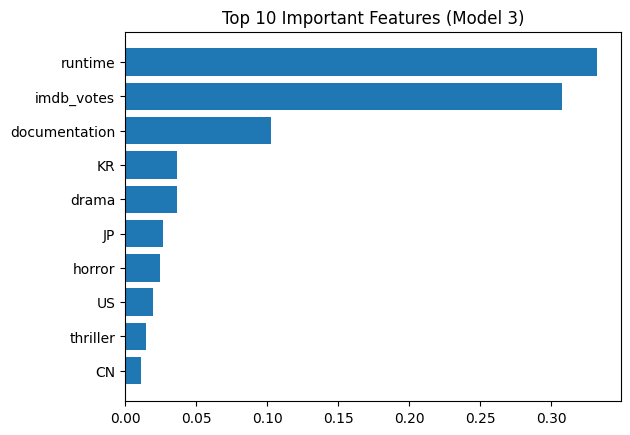

In [ ]:
#Wir schauen uns an welche Feature in unserem Modell am wichtigsten sind:

feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
top_10 = 10
pos = np.arange(top_10)
plt.barh(pos, feature_importance[sorted_idx][-top_10:], align='center')

plt.yticks(pos, np.array(X.columns)[sorted_idx][-top_10:])
plt.title('Top 10 Important Features (Model 3)')
plt.show()

Die Runtime, imdb Votes und die documentation sind die wichtigsten Feature zur Vorhersage unserer taget variable

###Hyperparameter Tuning

In [ ]:
parameter_grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                  'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750],
                  'max_depth': [2, 3, 4, 5, 6, 7]}

In [ ]:
optimized_gbr = RandomizedSearchCV(gbr, parameter_grid, n_iter=10, n_jobs=-1, random_state=42, verbose=3)
optimized_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.15, 0.1, 0.05, 0.01,
                                                          0.005, 0.001],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000, 1250, 1500,
                                                         1750]},
                   random_state=42, verbose=3)

In [ ]:
optimized_gbr.best_params_

{'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01}

In [ ]:
evaluate(optimized_gbr, X_test, y_test)

R2: 0.39258404921044165
MAE: 0.6181853820103025
MSE: 0.6854231762469128
RMSE: 0.8279028785110684
MAPE: 0.10374742565799673


Unser Modell nach dem Hyperparameter Tuning ist minimal besser.

In [ ]:
best_gbr = optimized_gbr.best_estimator_

###Error Analyse

In [ ]:
#Wir pürfen auf Overfitting:

best_gbr = optimized_gbr.best_estimator_
predictions = best_gbr.staged_predict(X_test)
n_estimators = optimized_gbr.best_params_['n_estimators']

test_score = np.zeros((n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(predictions):
    test_score[i] = best_gbr.loss_(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


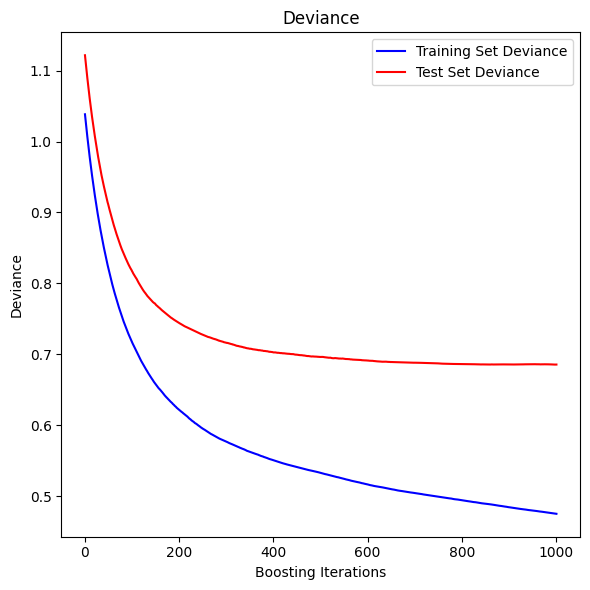

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, best_gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Im Schaubild sehen wir Anzeichen von Overfitting, da die Training Set Deviance weiter abnimmt, während die Test Set Deviance sich stabilisiert.

Ab circa 300 Iteration verbessert das Durchführen weiterer Iterationen die Leistung des Modells nicht signifikant sondern verursach eher Overfitting.

In [ ]:
#Wir prüfen die Fehlerquellen im Detail:

predictions = best_gbr.predict(X_test)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
df_with_predictions['pred_diff'] = np.abs(df_with_predictions['target_variable'] - df_with_predictions.Prediction)

<Axes: ylabel='Frequency'>

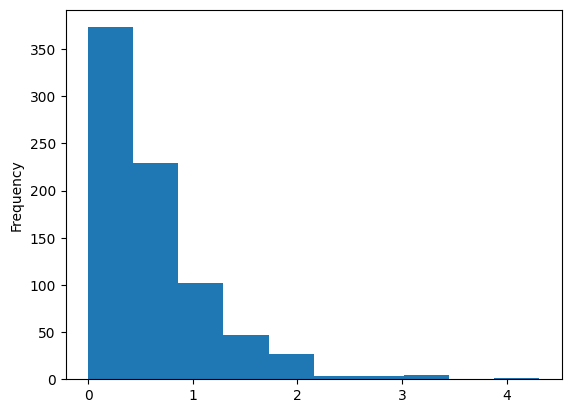

In [ ]:
df_with_predictions.pred_diff.plot(kind='hist')

<ipython-input-20-3cb28642efd5>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


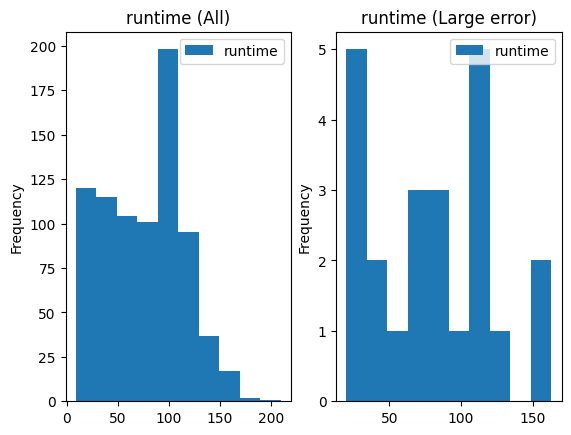

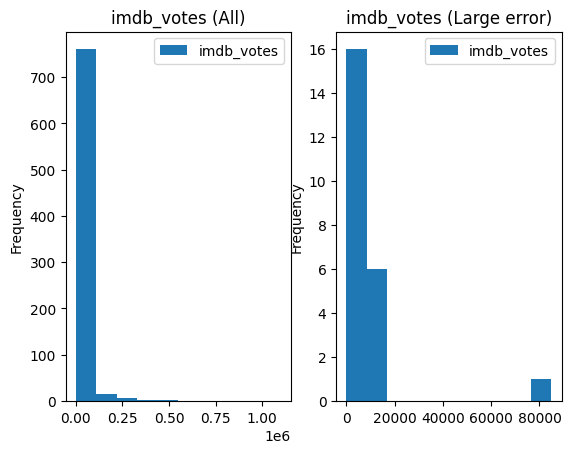

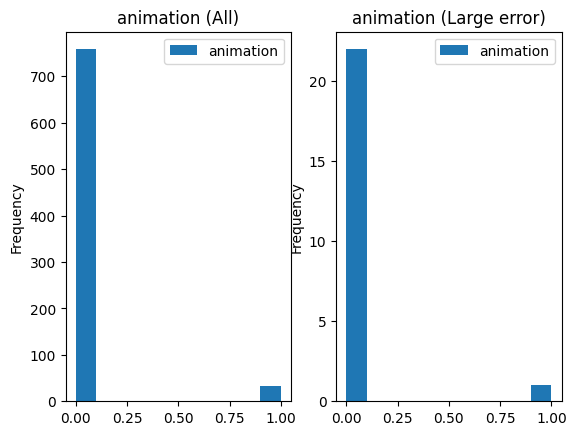

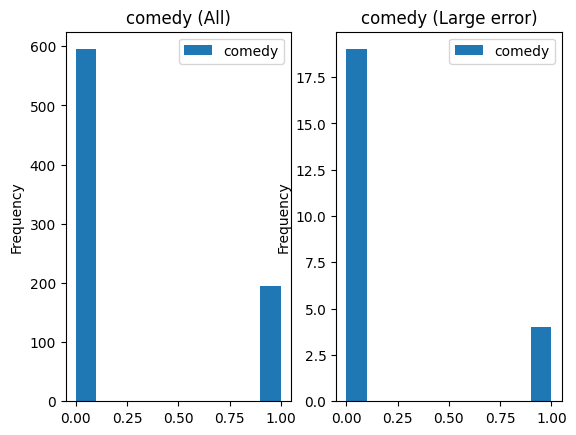

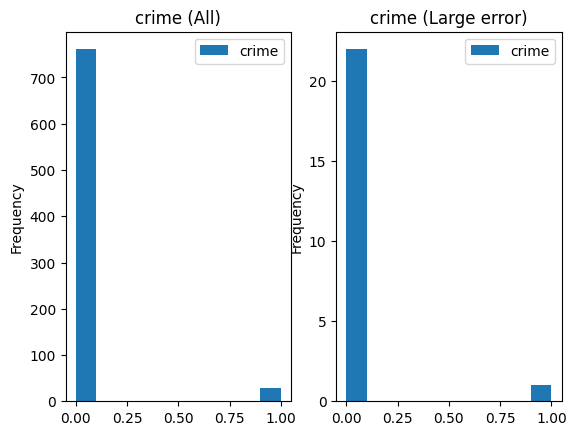

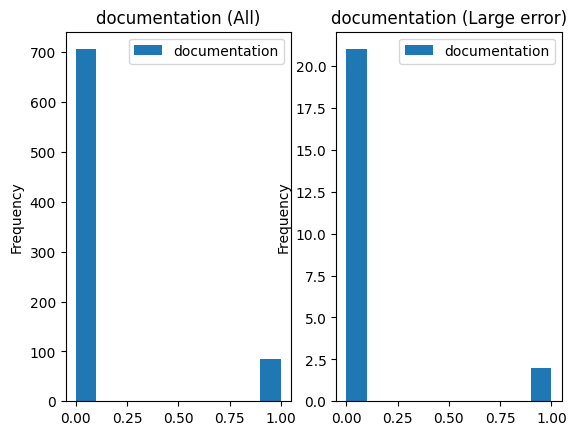

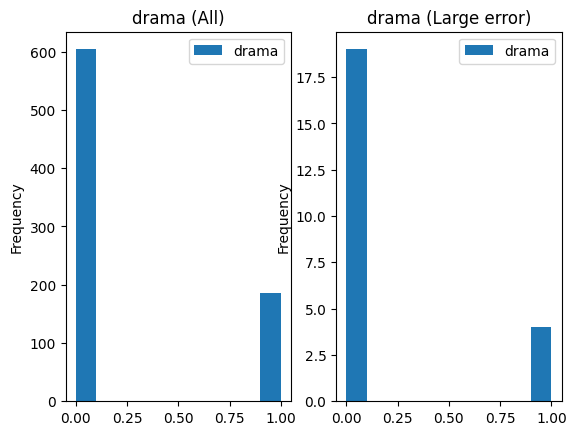

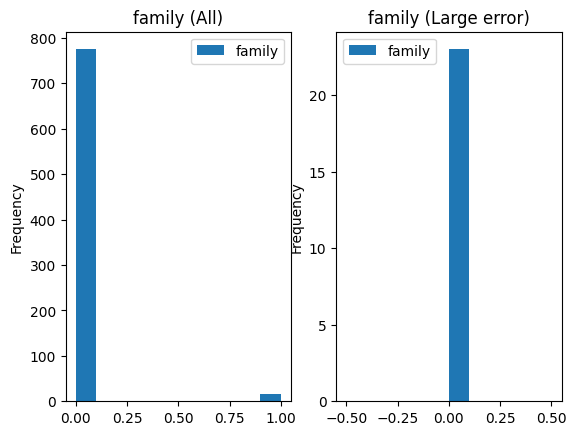

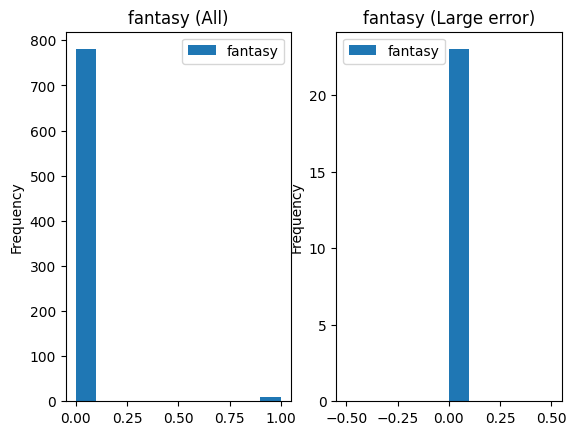

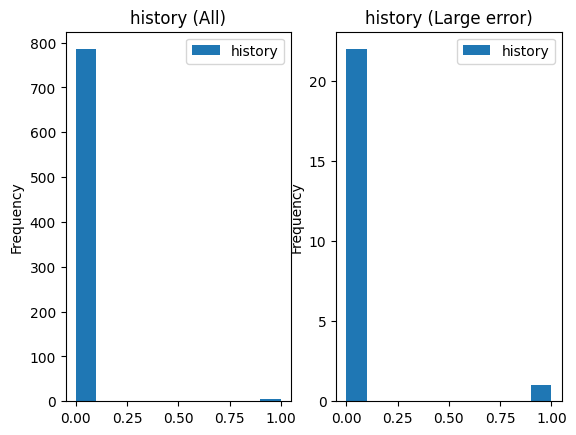

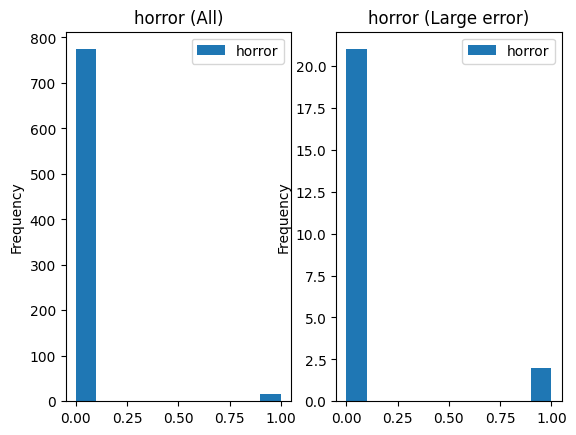

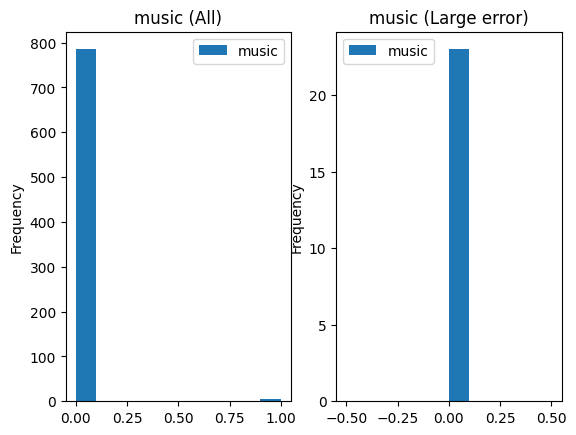

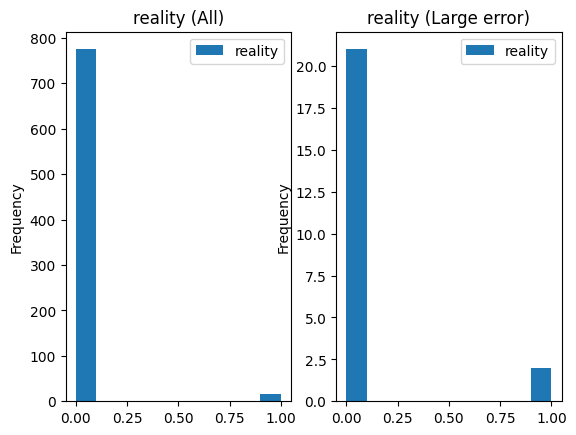

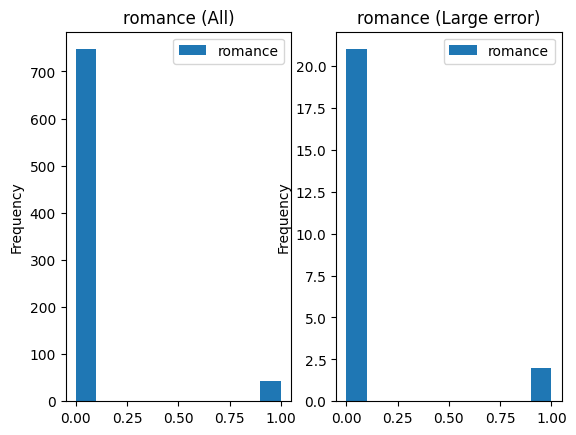

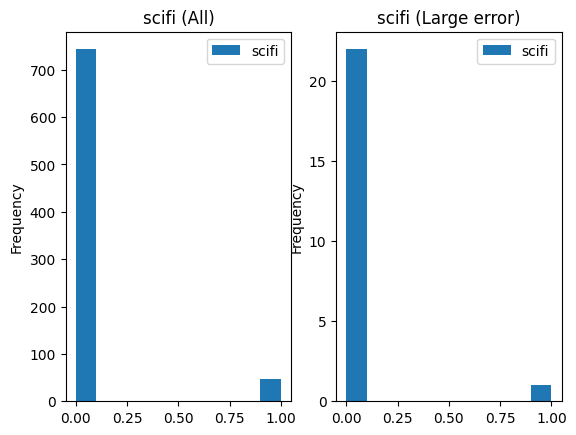

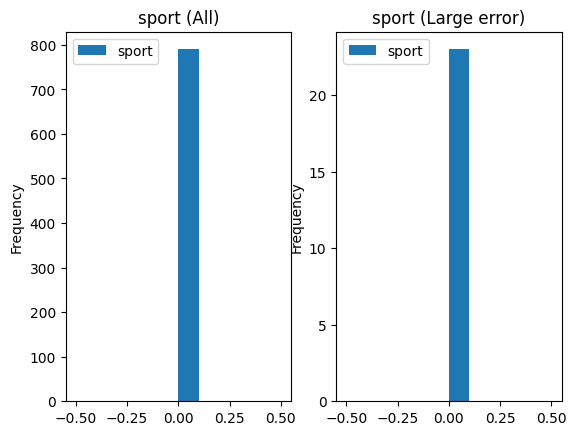

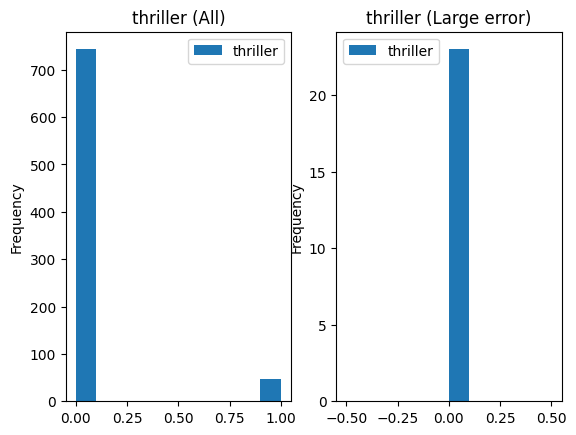

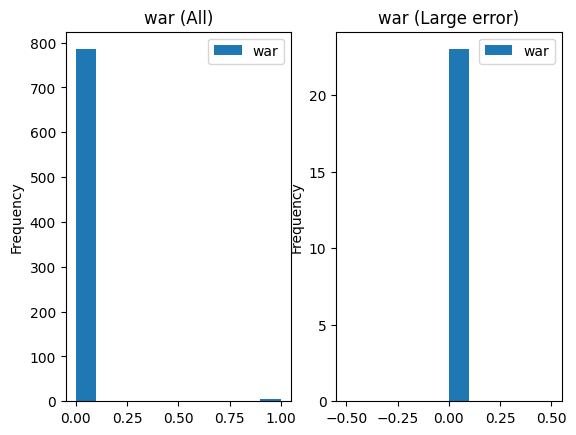

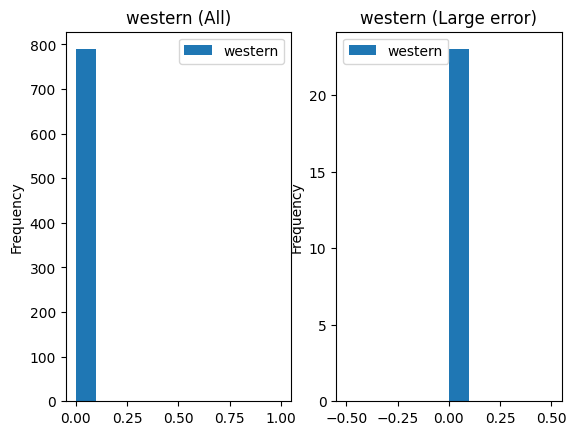

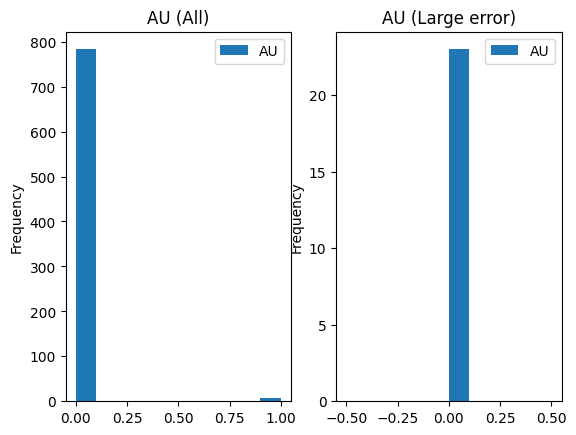

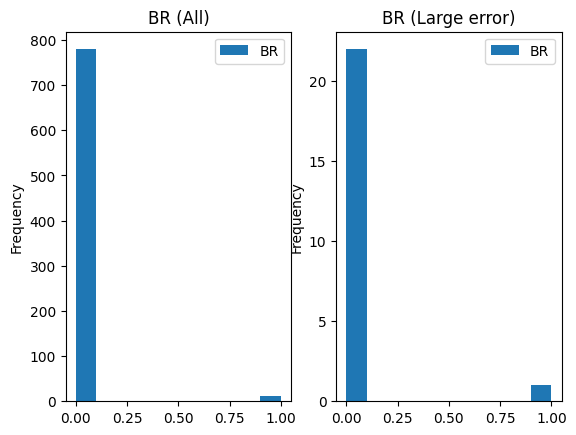

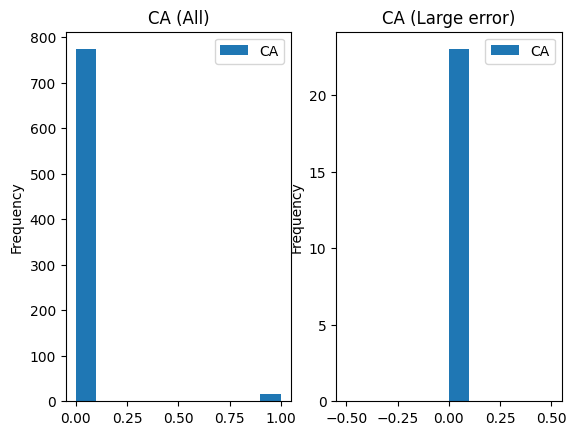

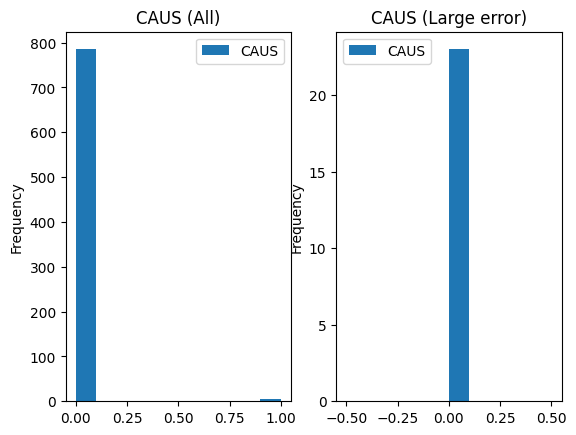

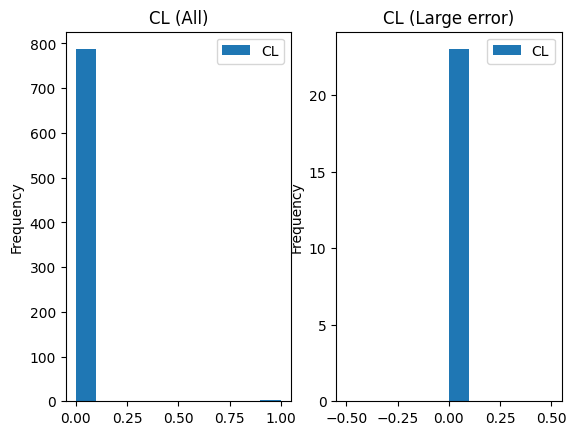

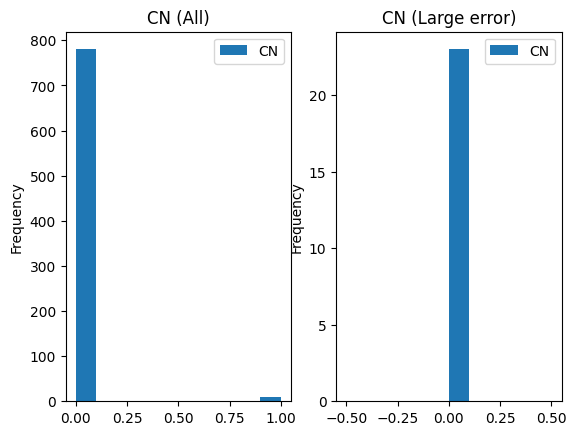

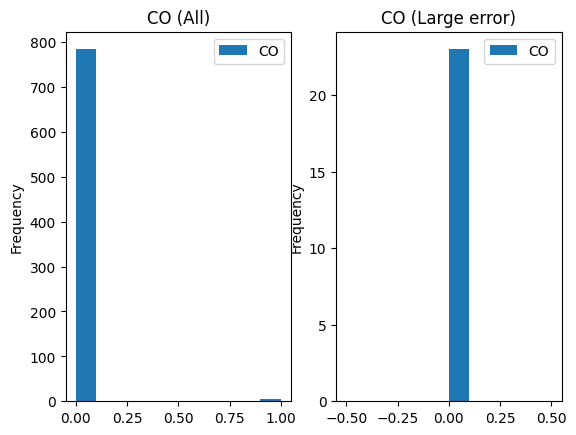

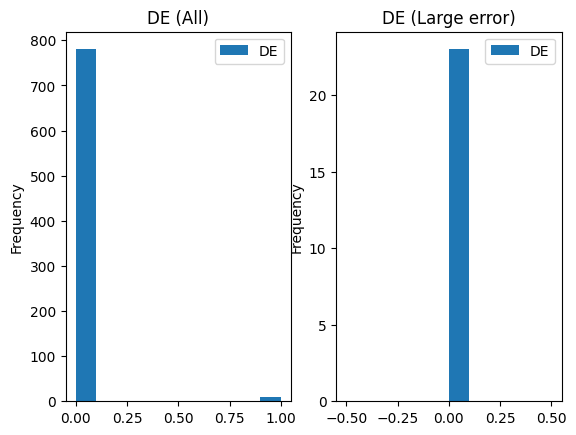

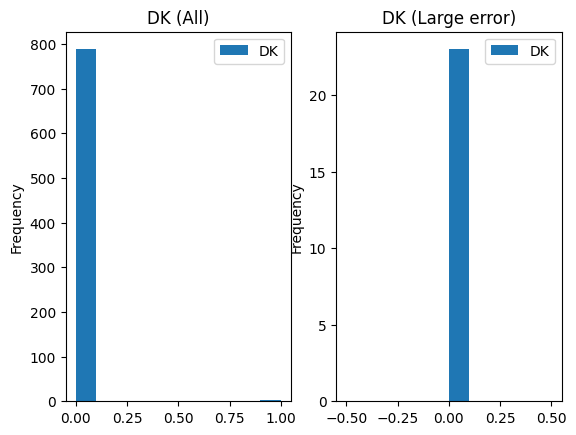

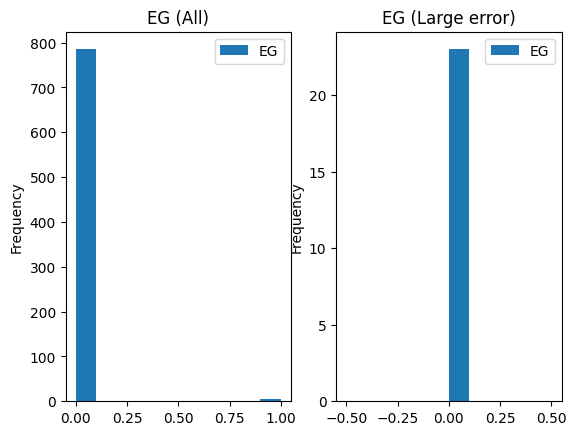

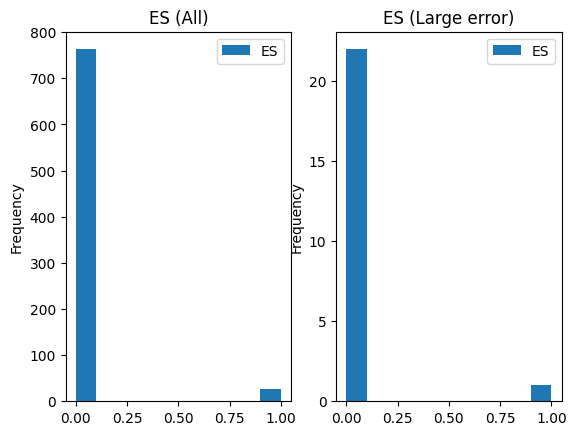

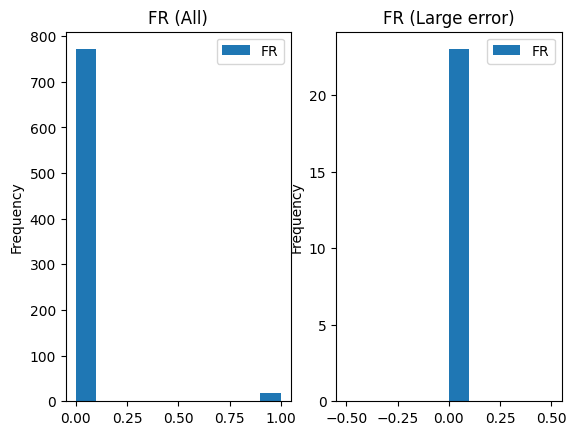

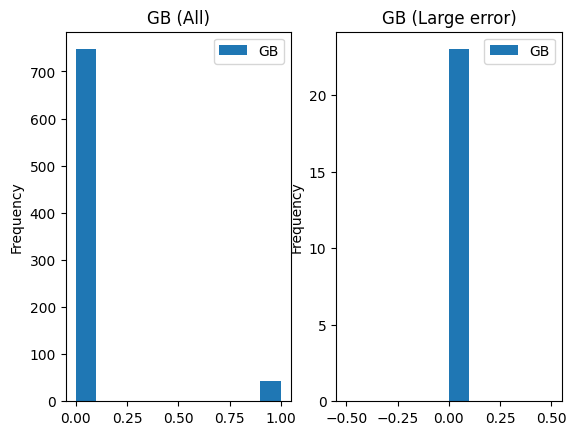

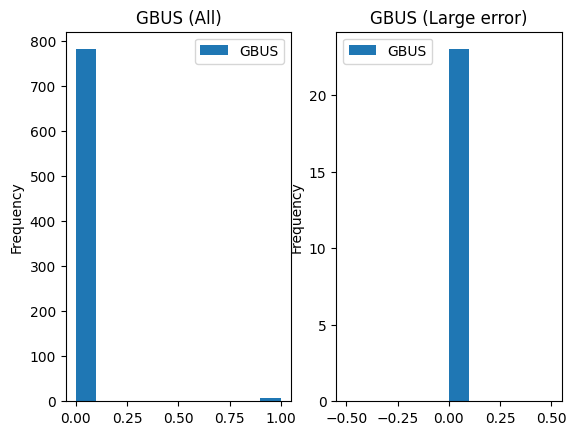

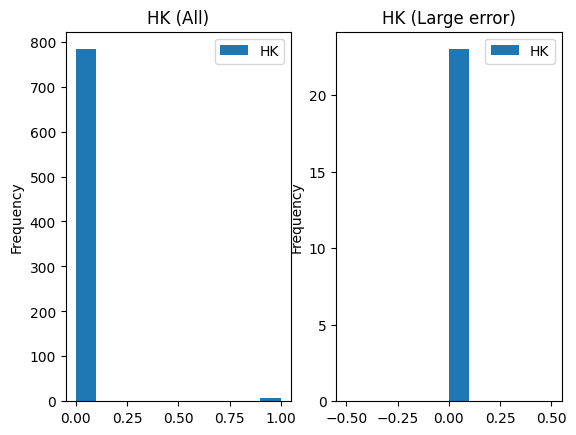

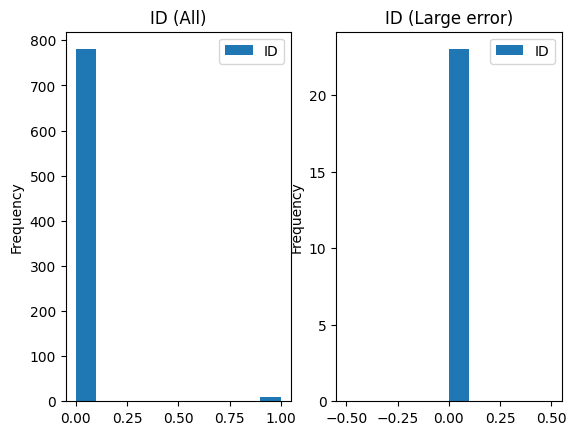

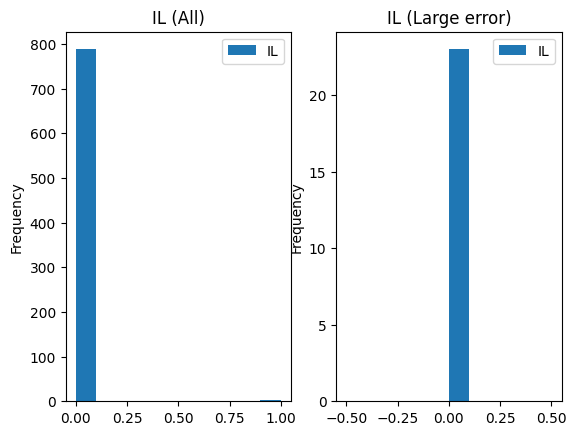

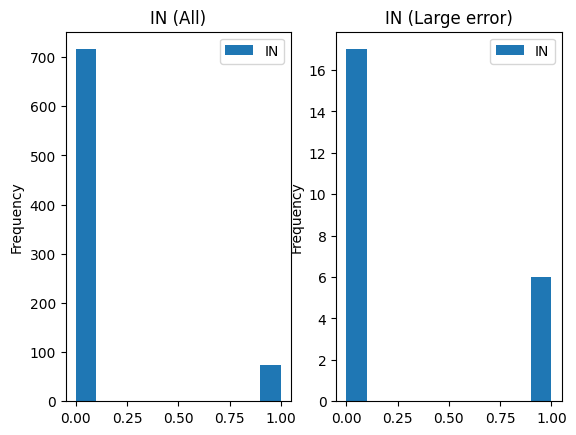

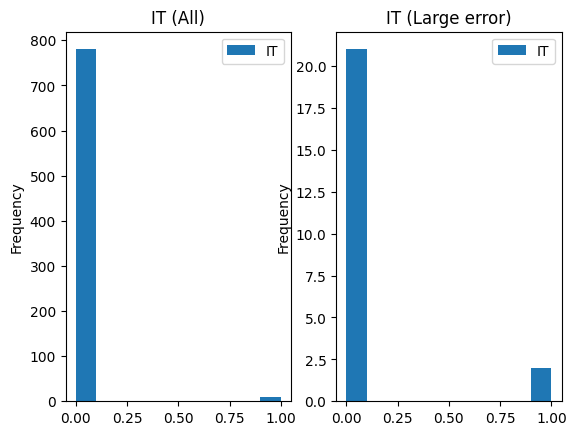

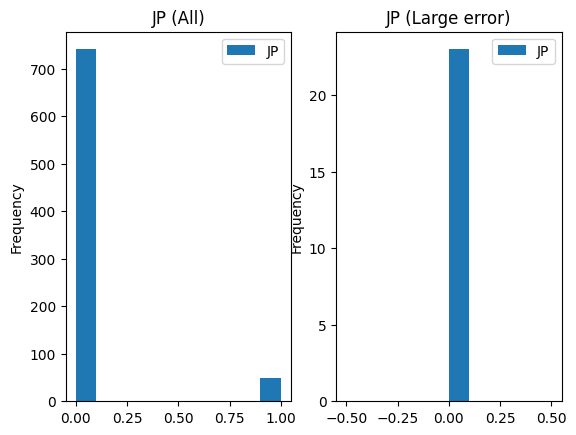

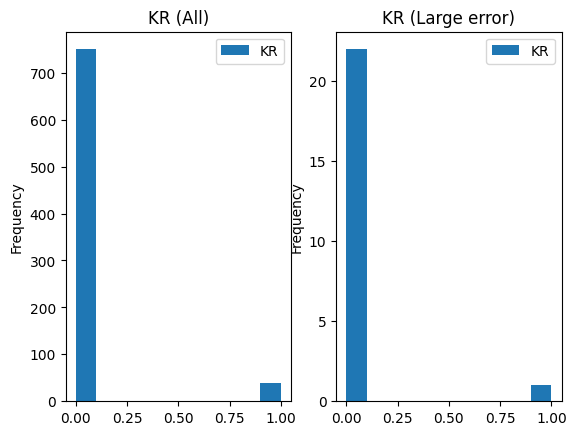

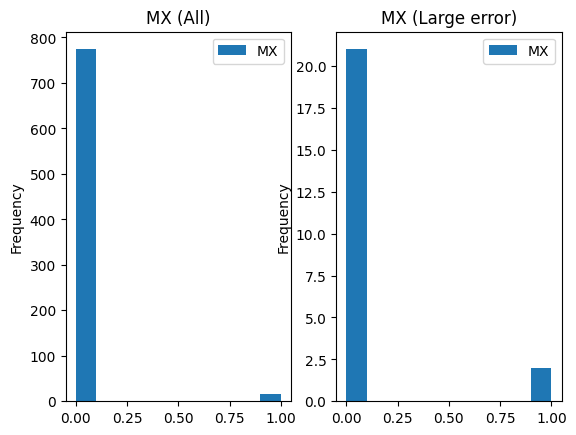

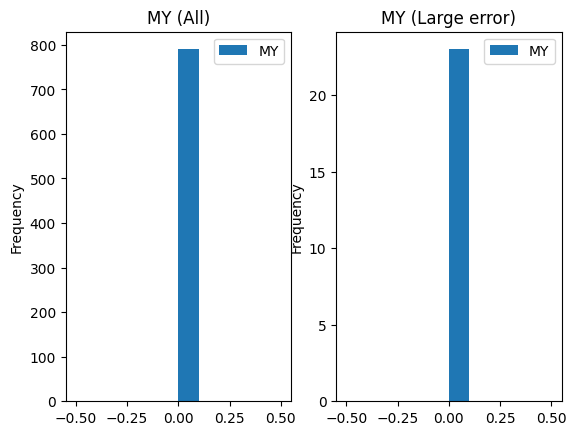

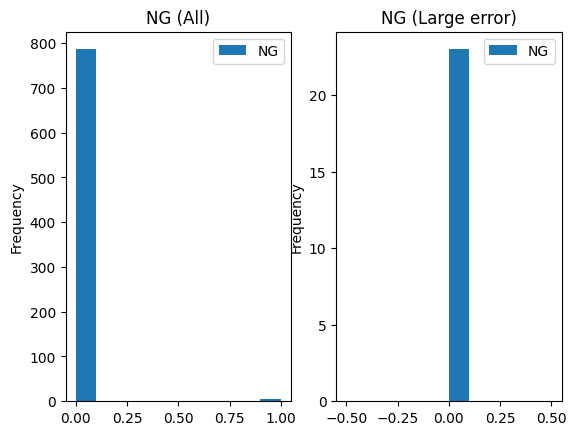

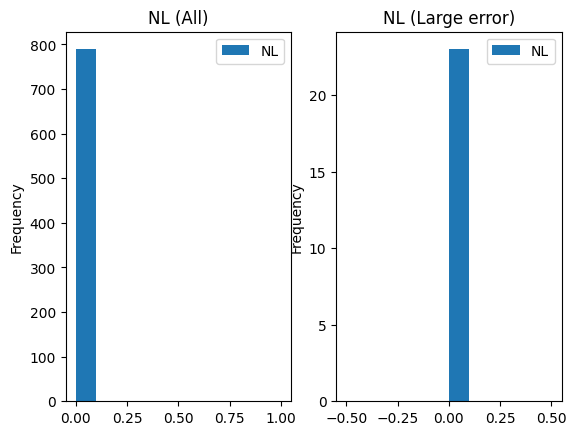

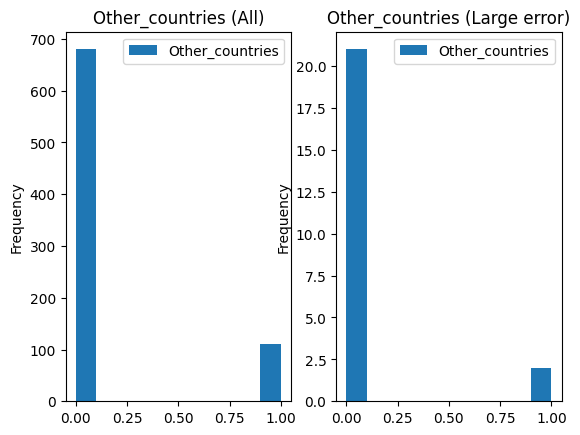

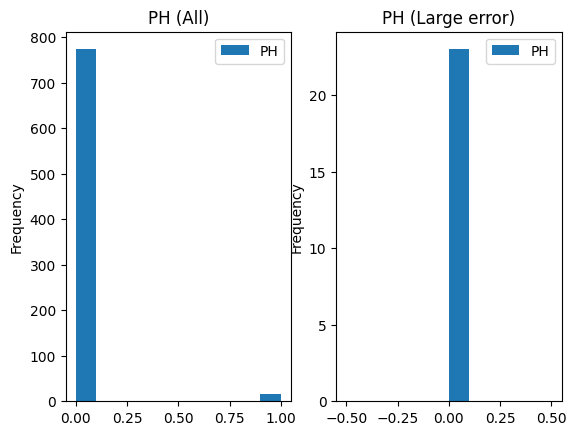

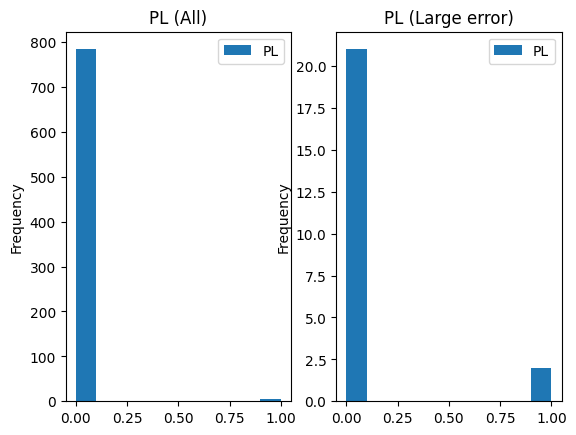

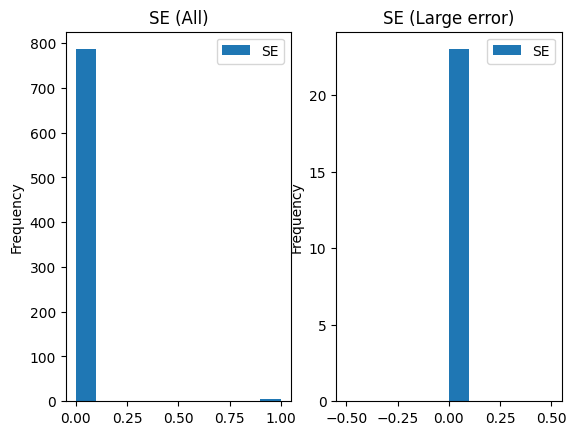

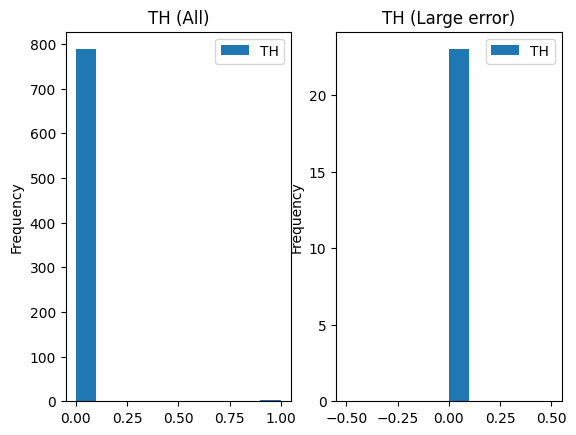

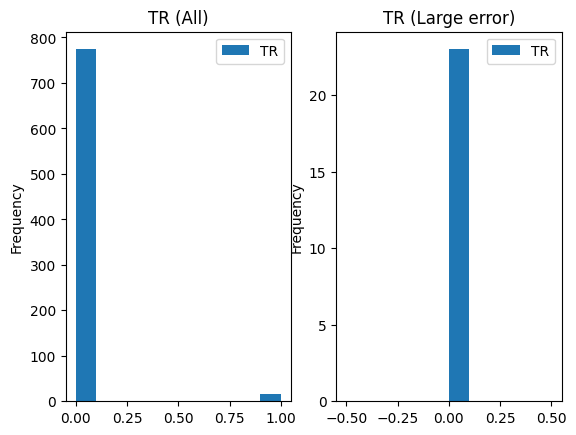

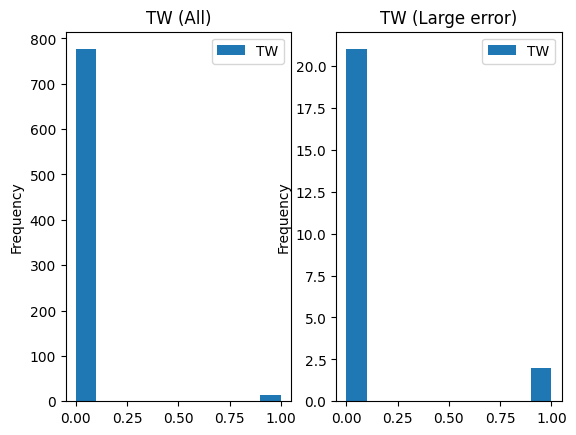

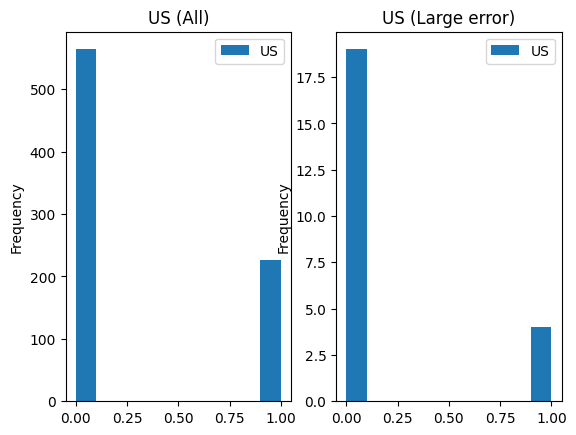

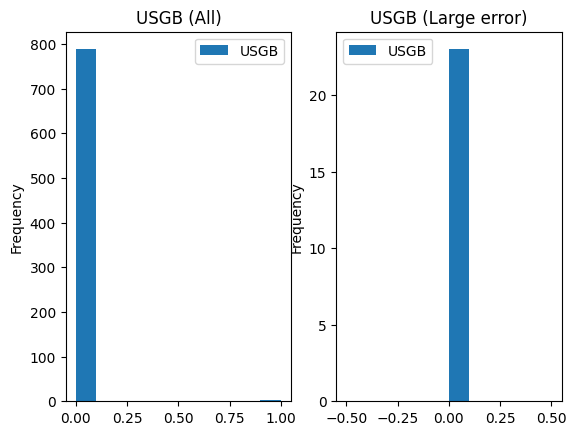

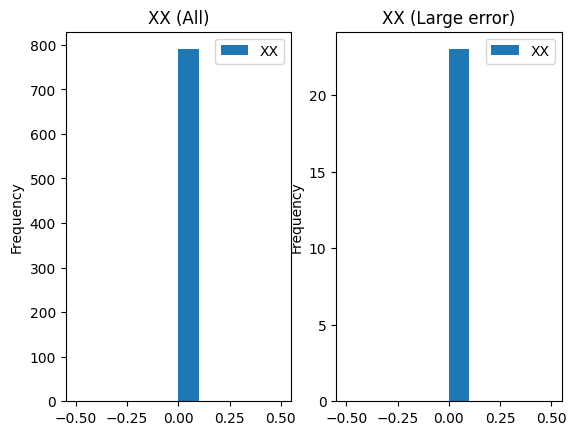

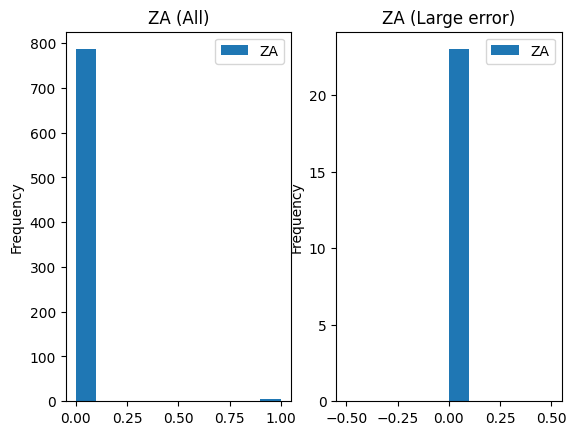

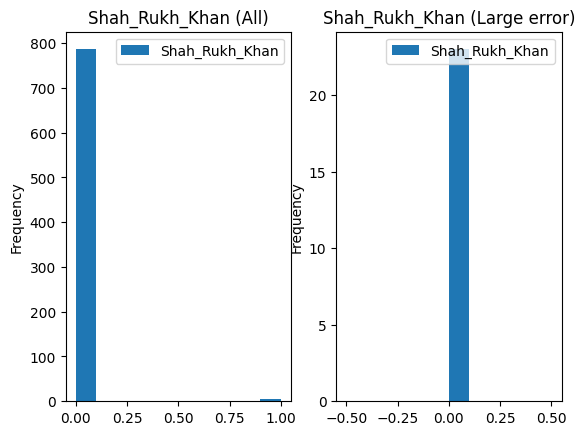

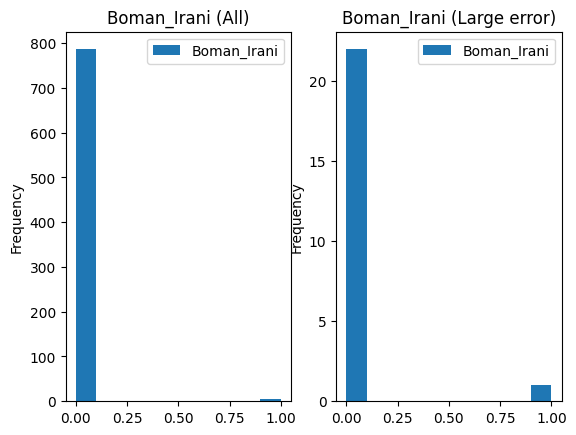

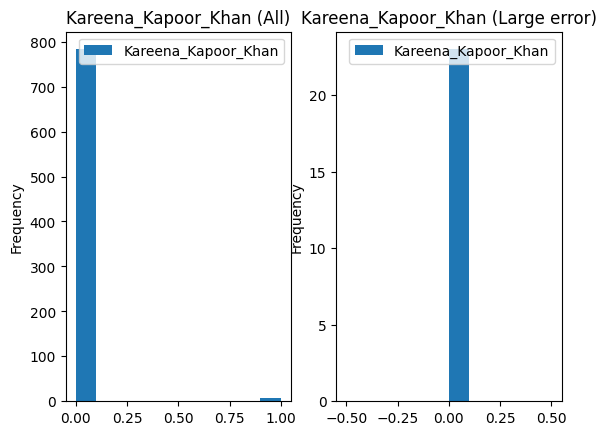

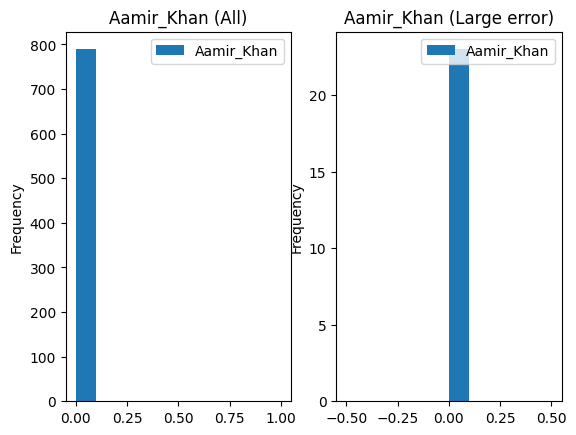

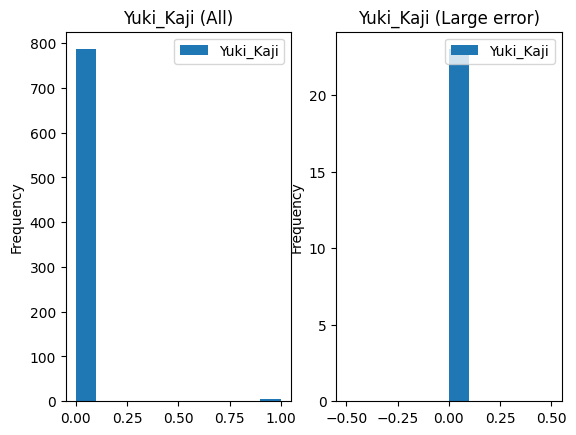

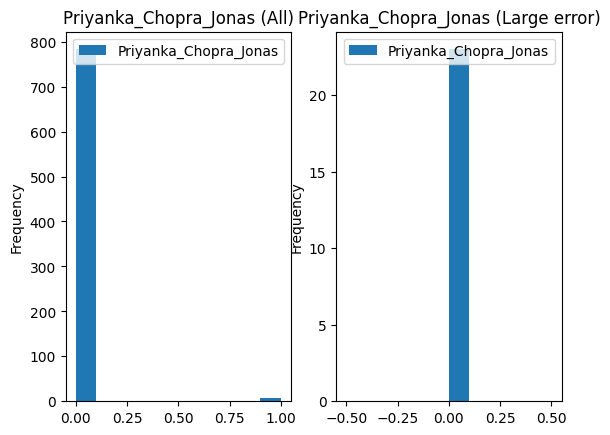

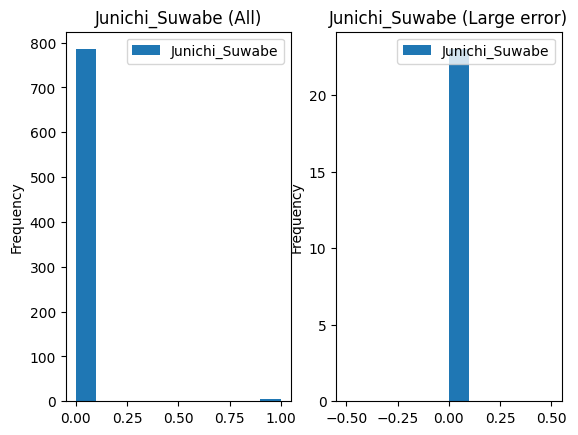

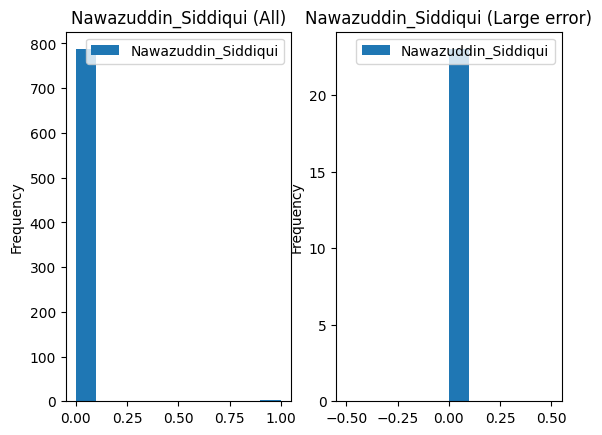

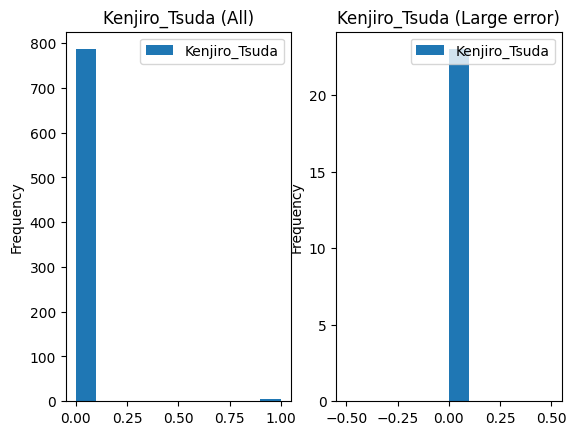

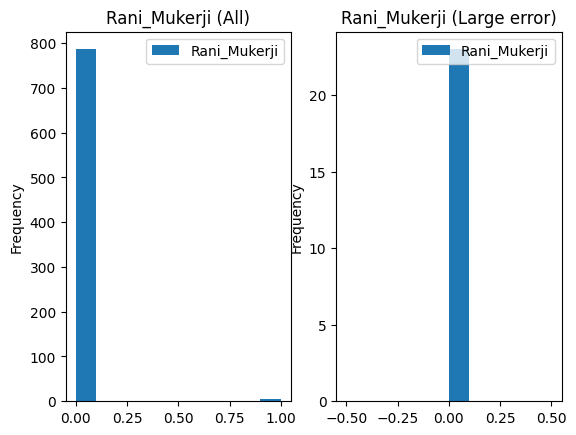

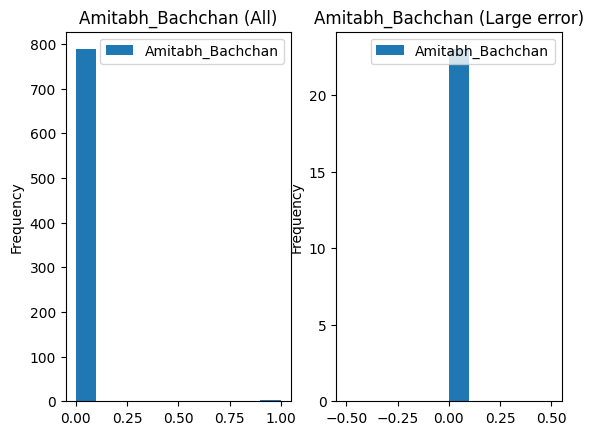

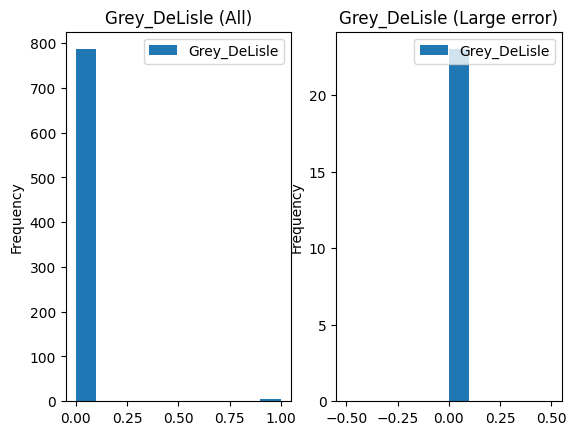

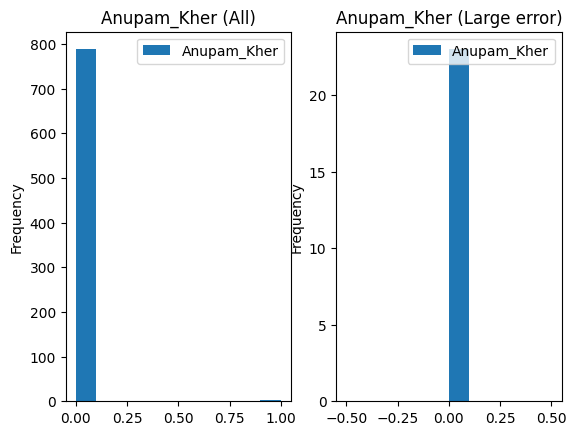

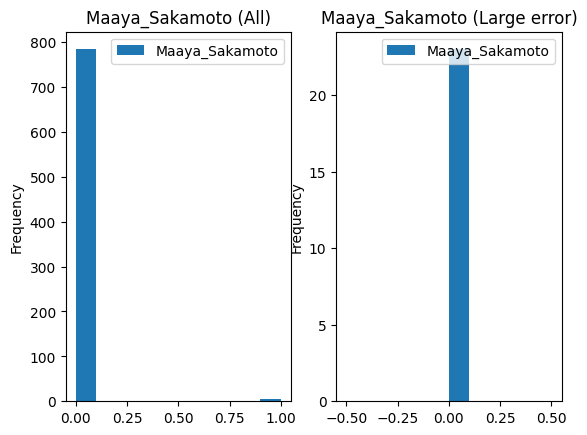

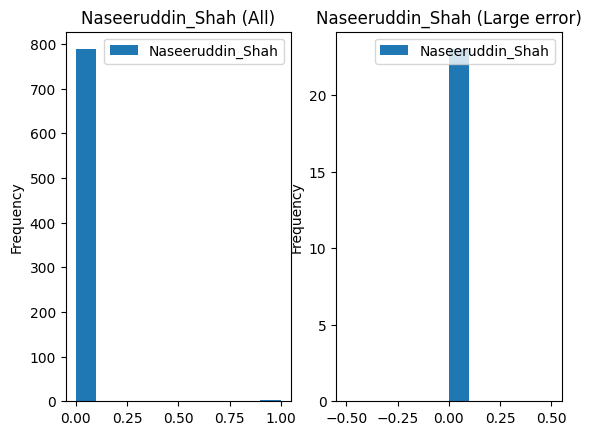

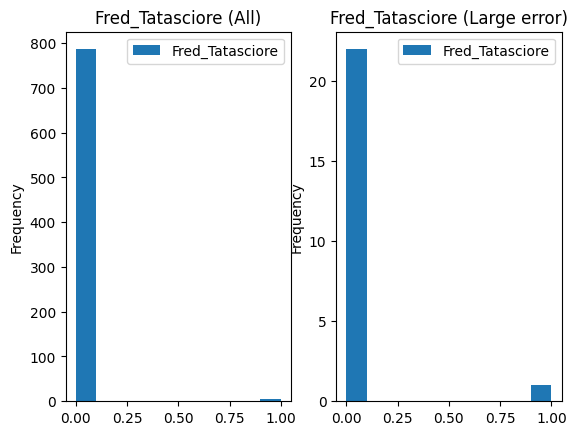

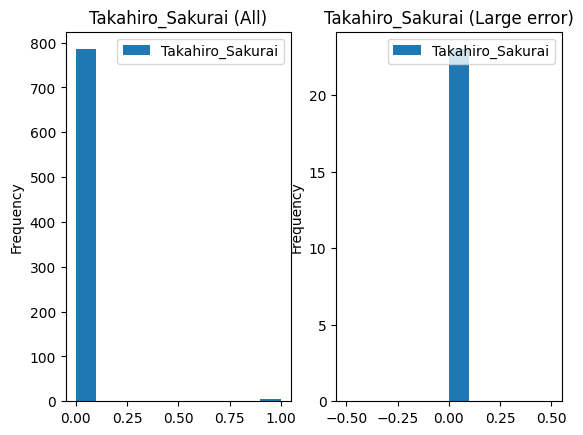

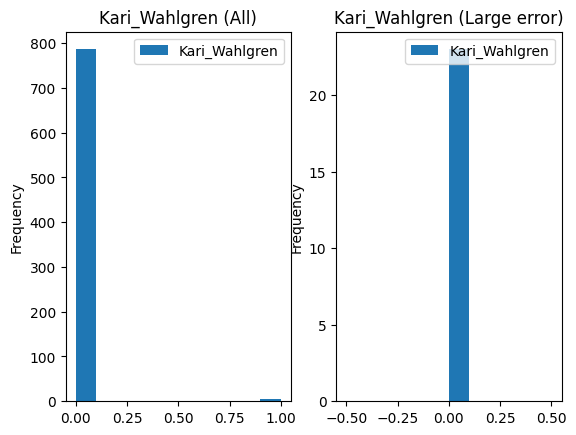

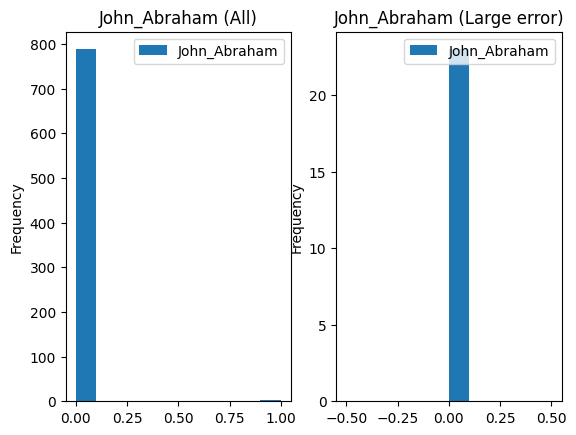

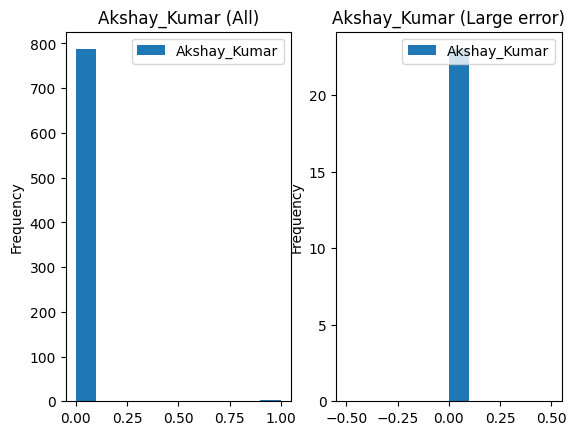

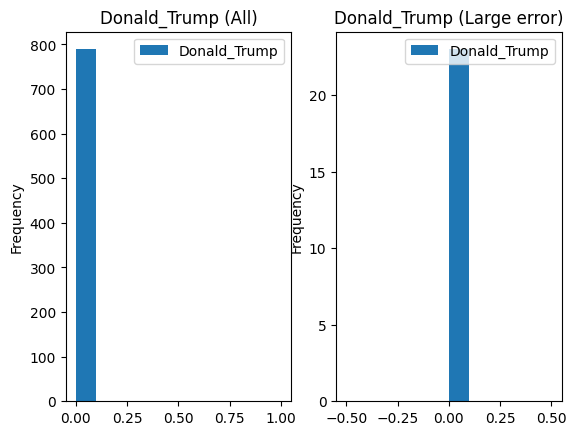

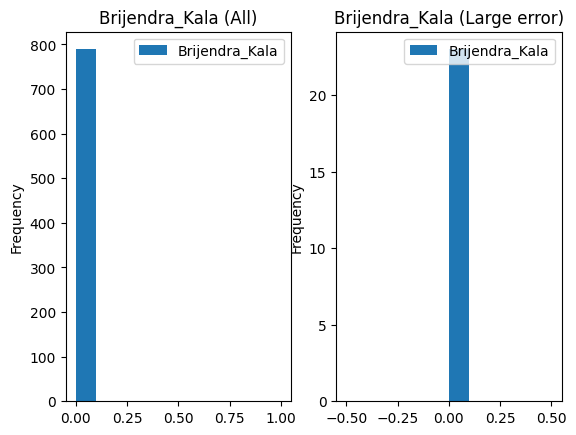

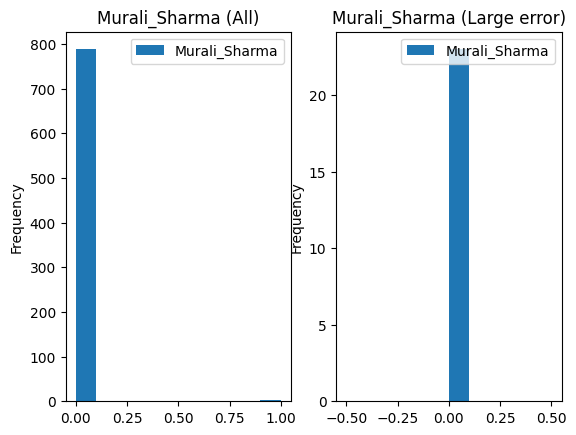

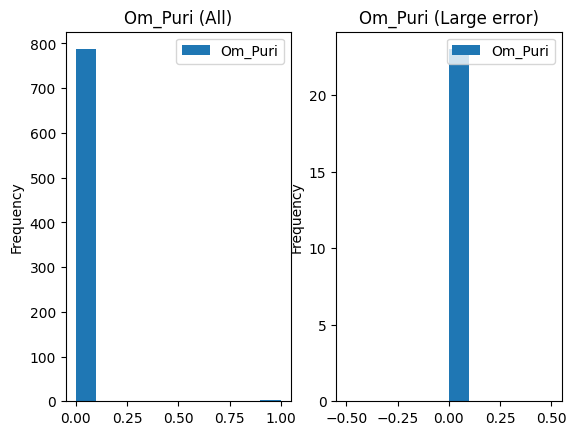

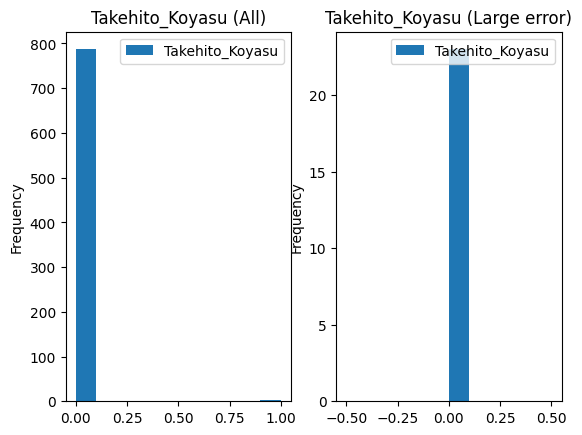

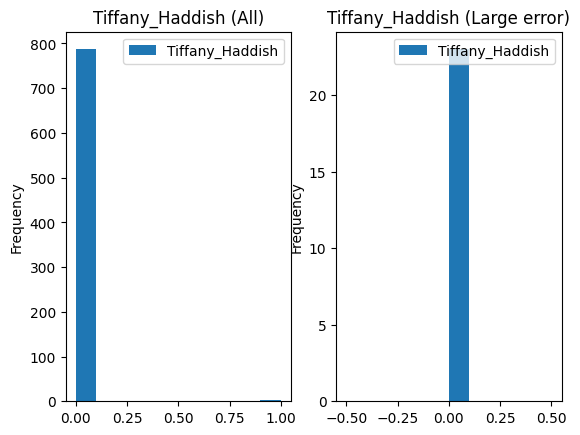

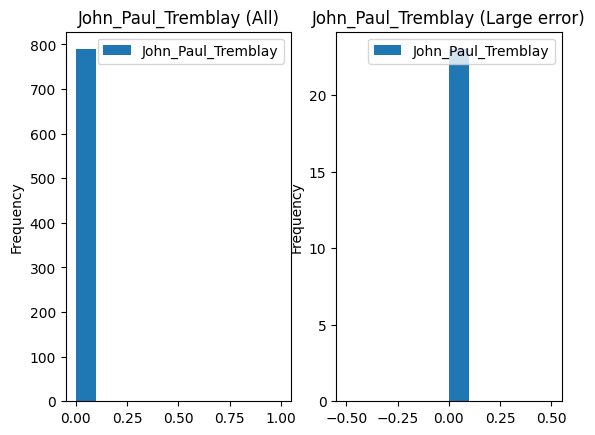

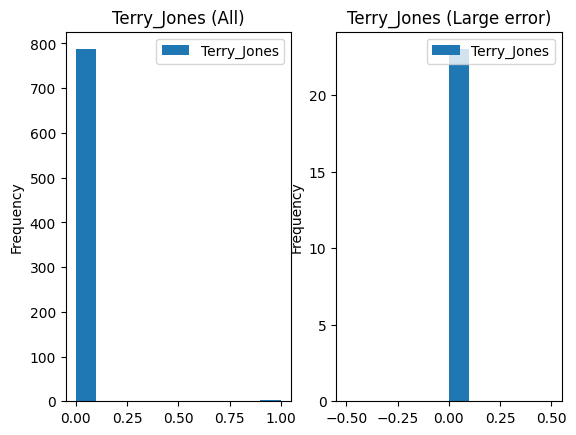

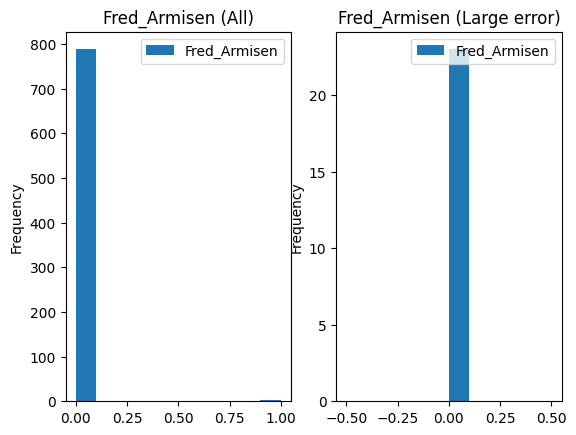

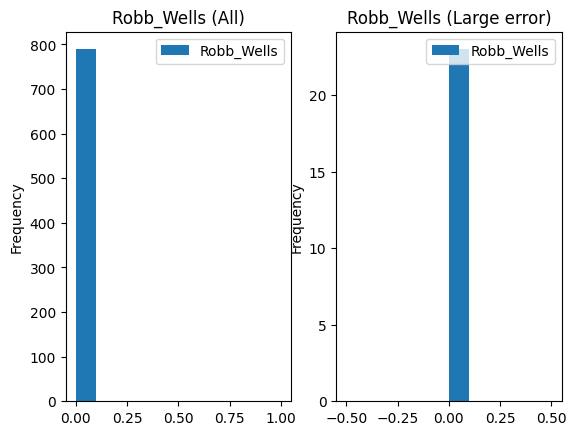

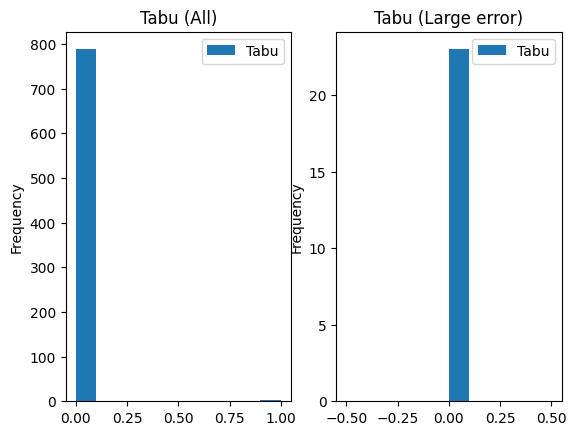

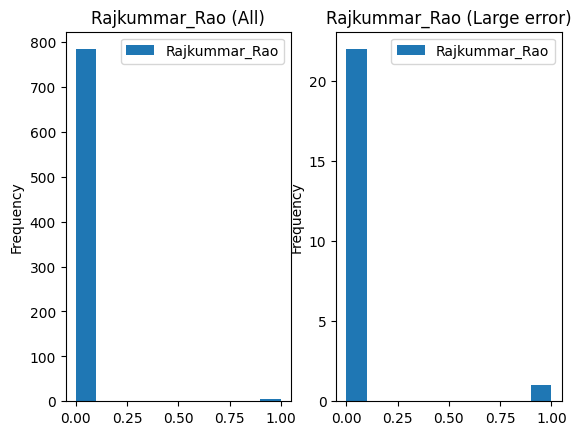

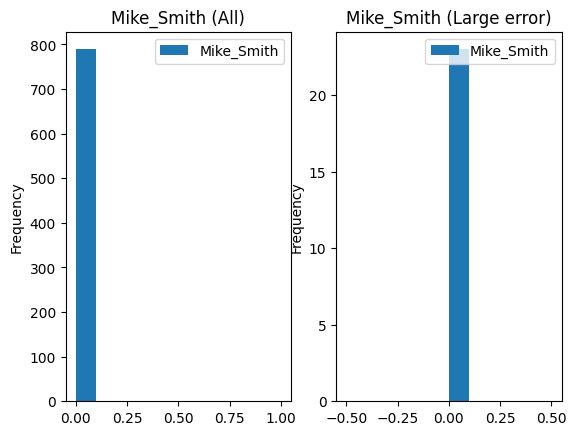

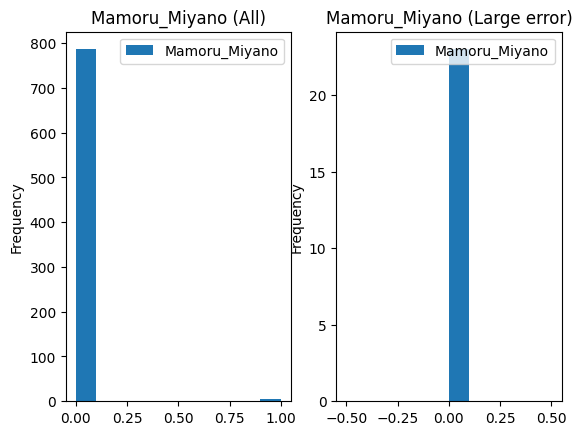

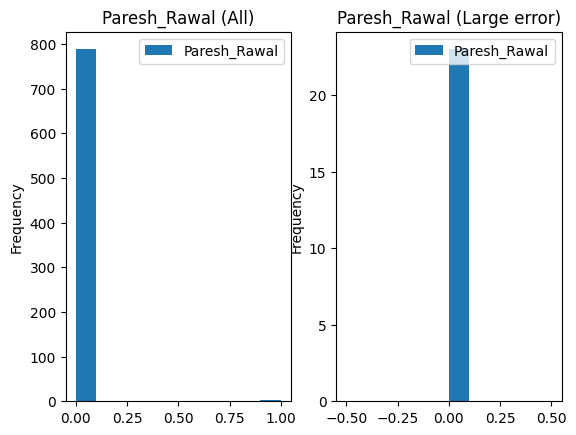

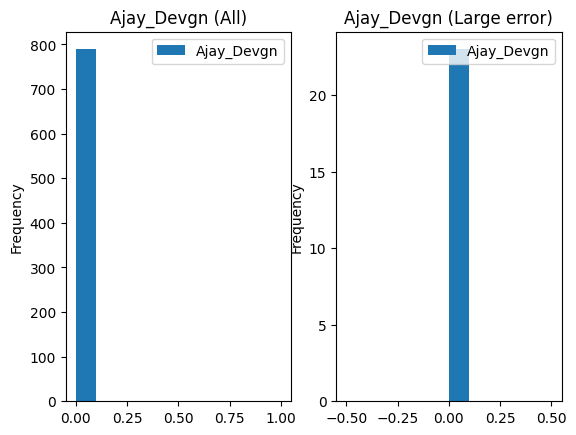

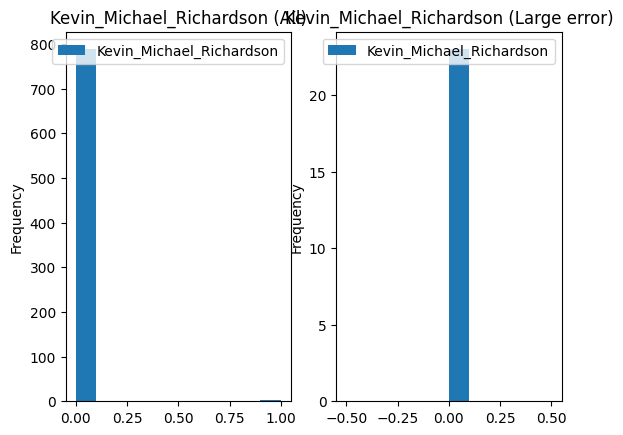

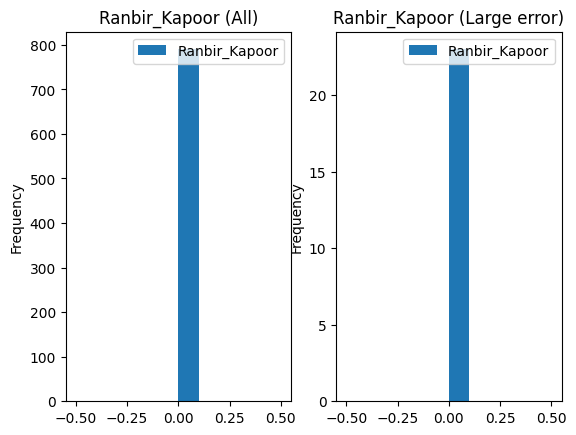

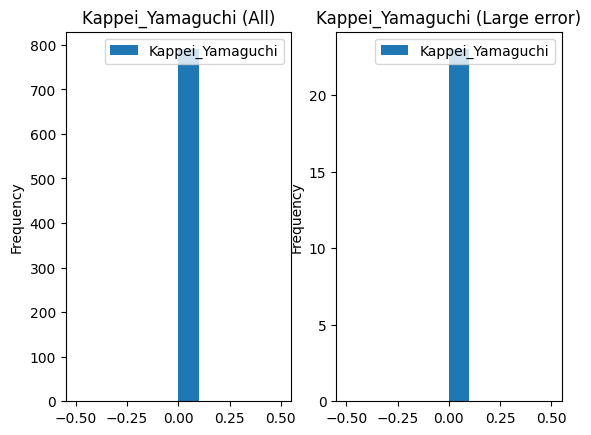

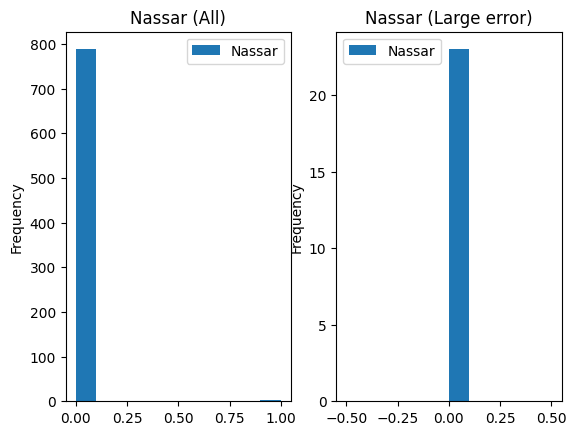

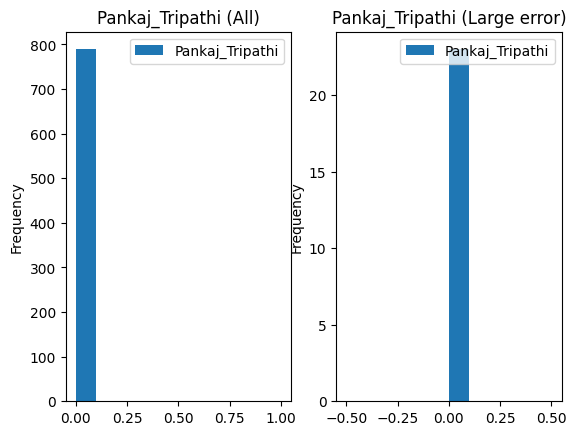

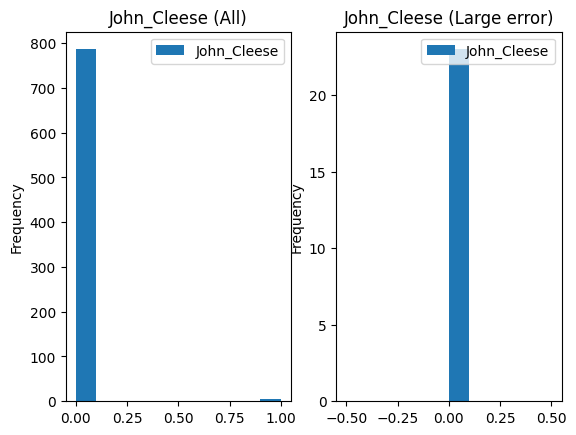

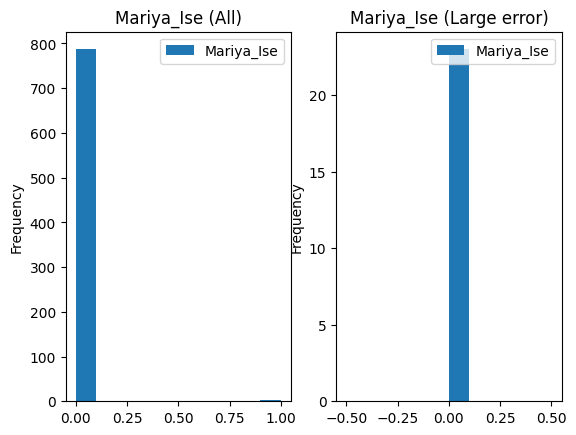

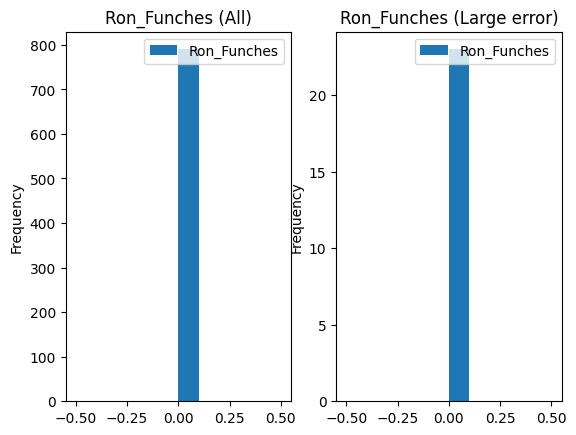

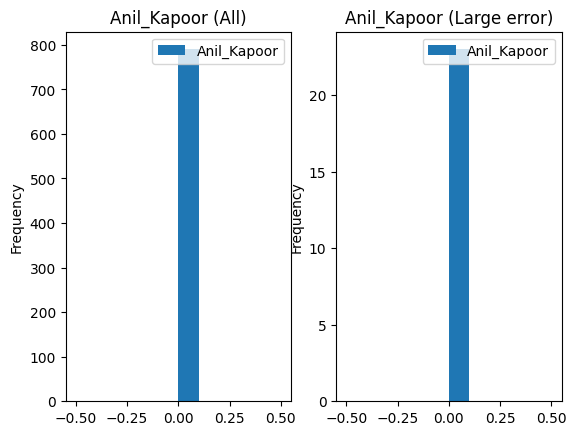

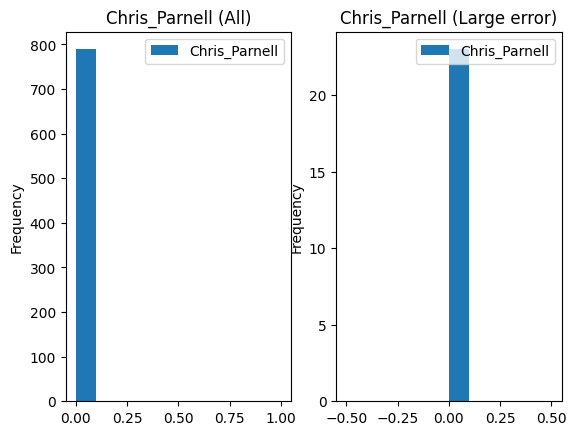

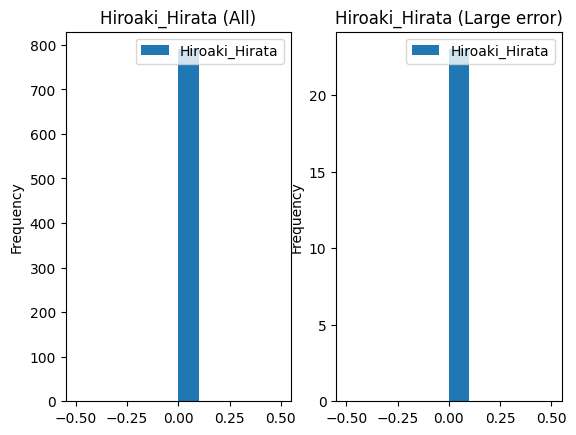

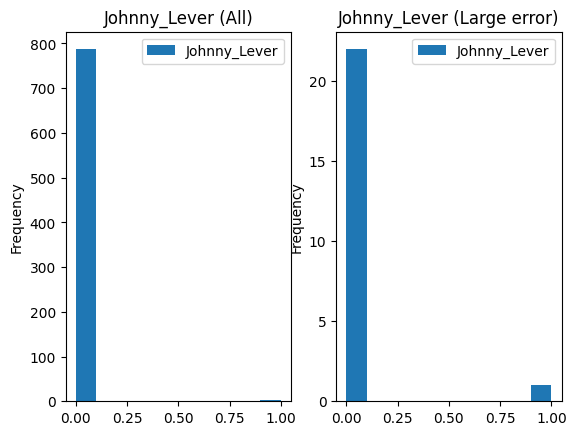

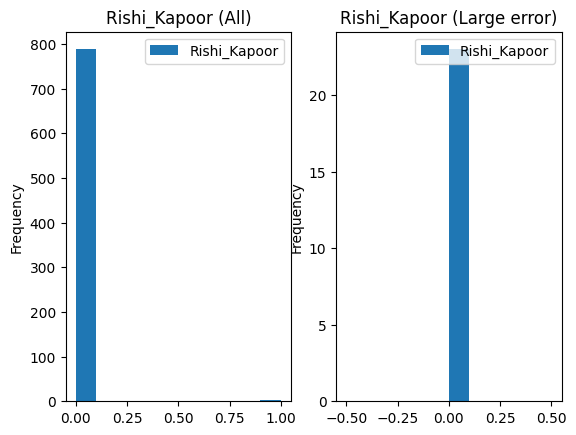

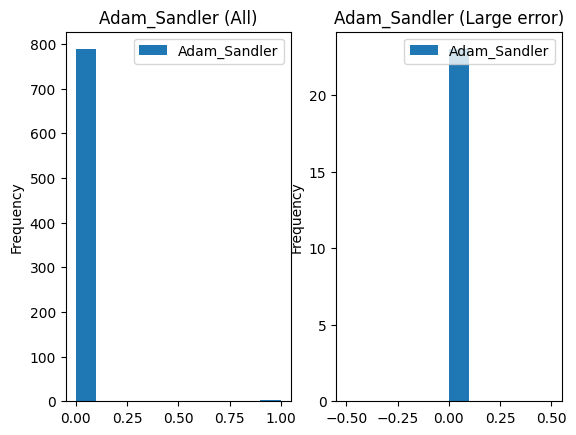

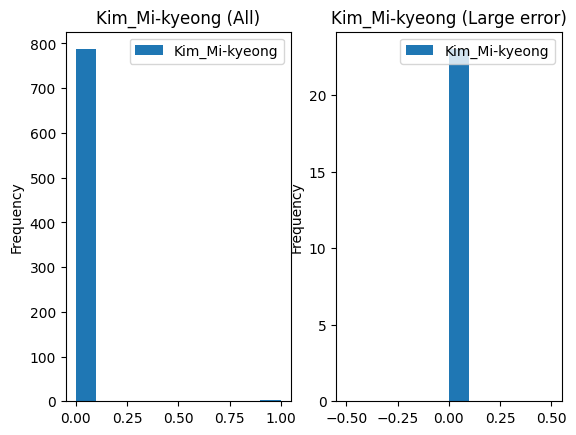

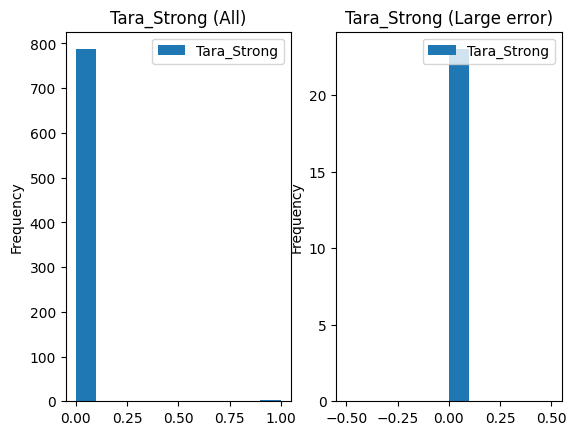

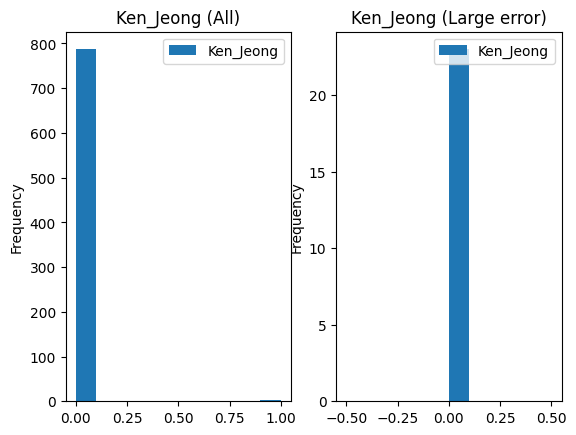

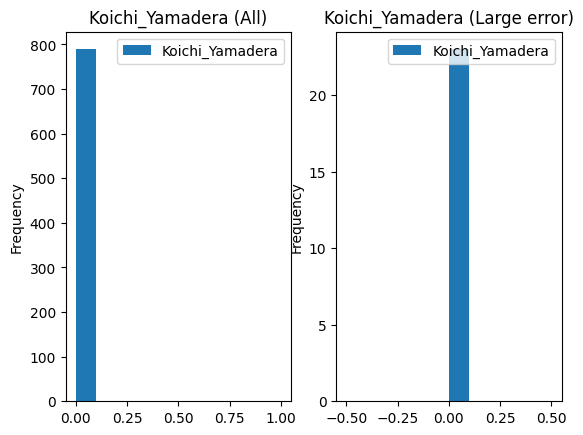

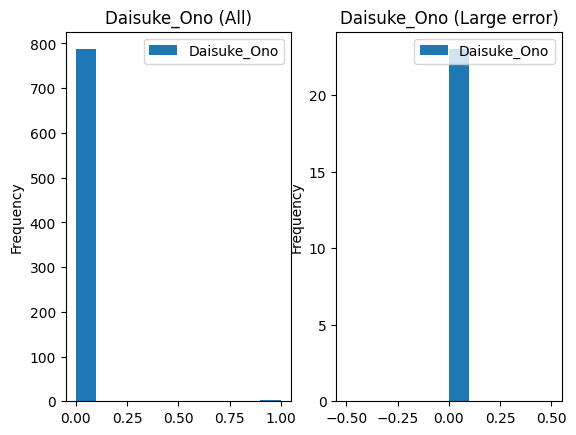

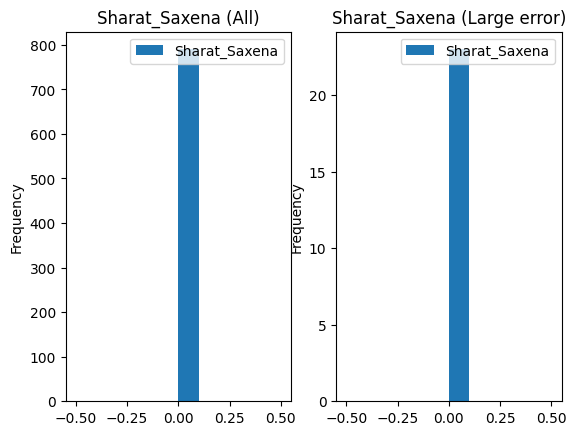

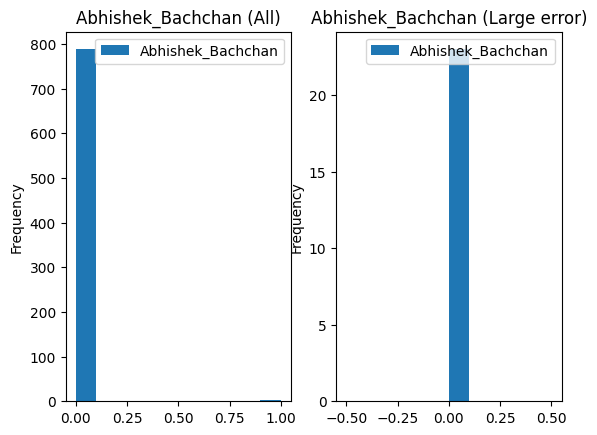

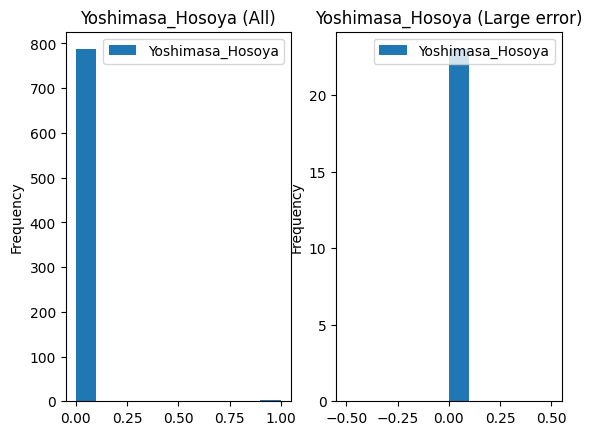

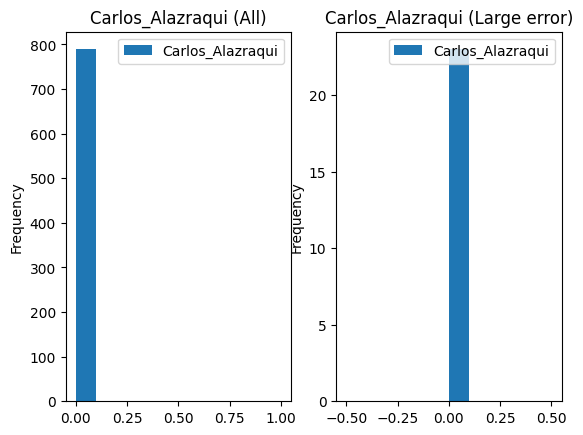

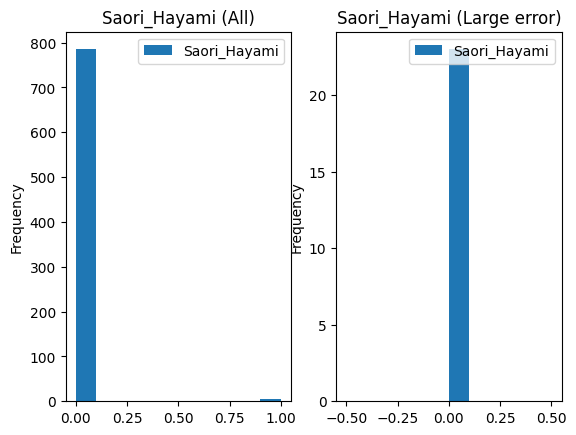

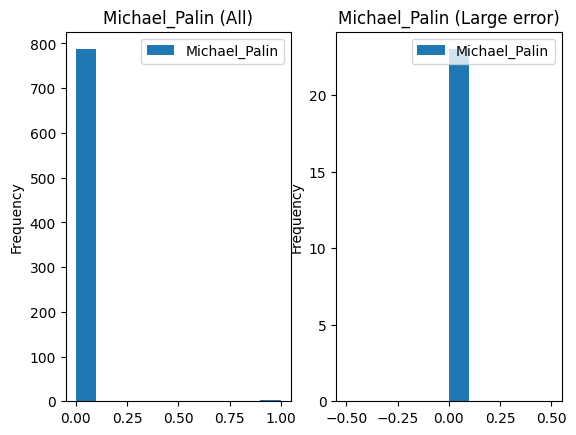

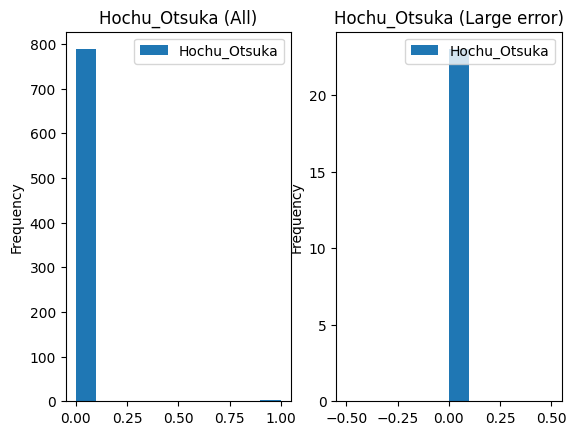

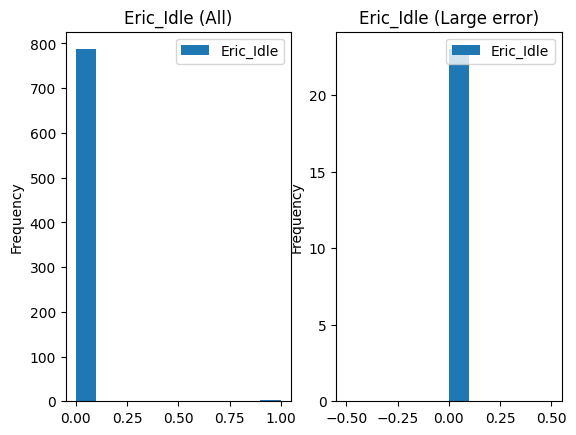

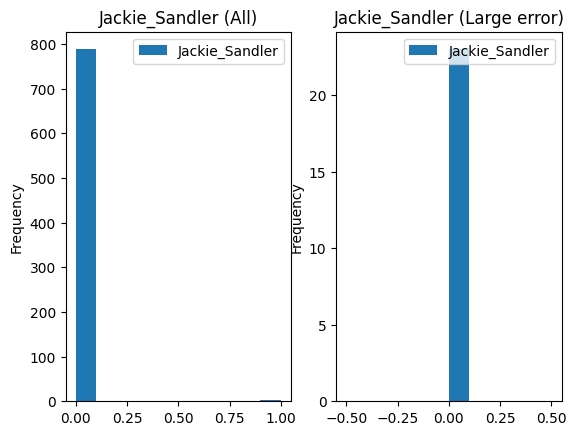

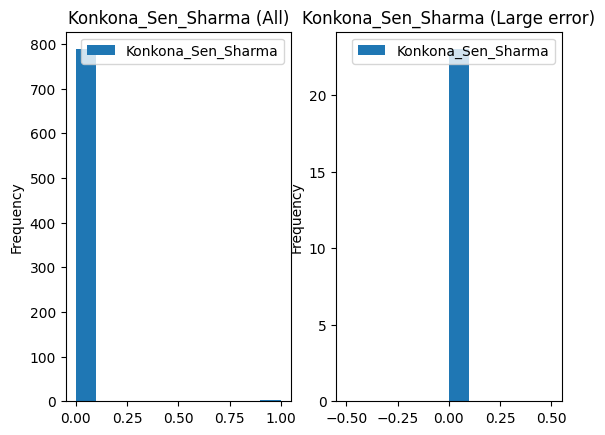

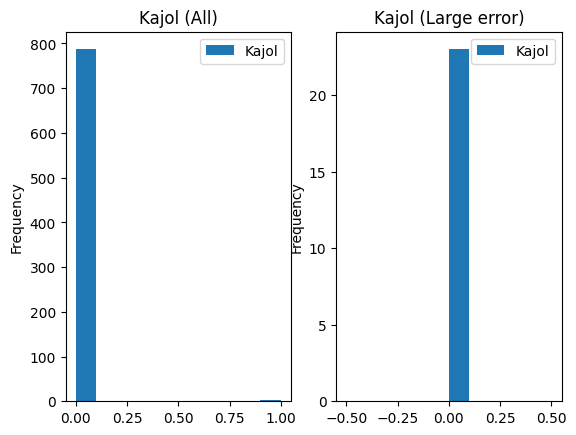

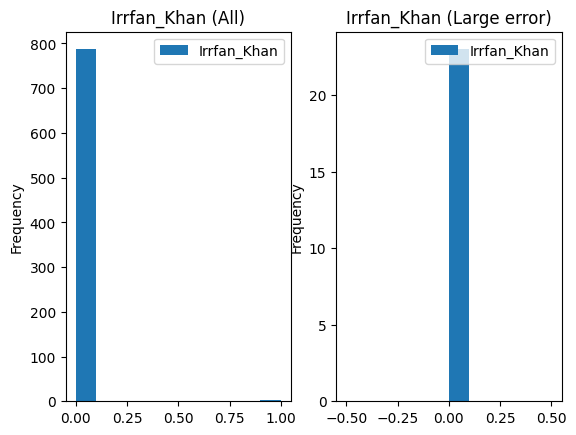

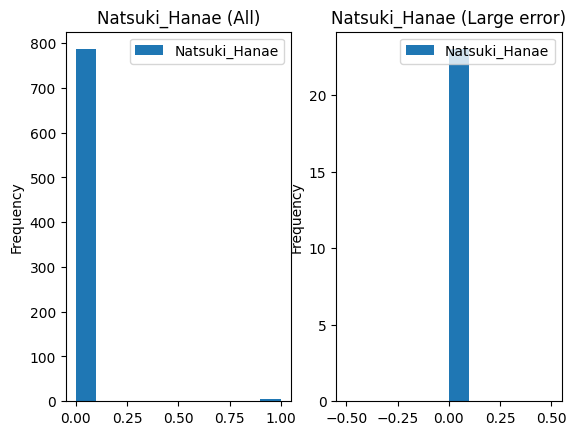

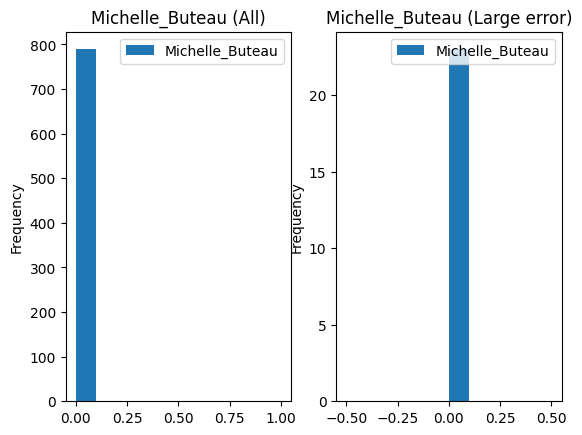

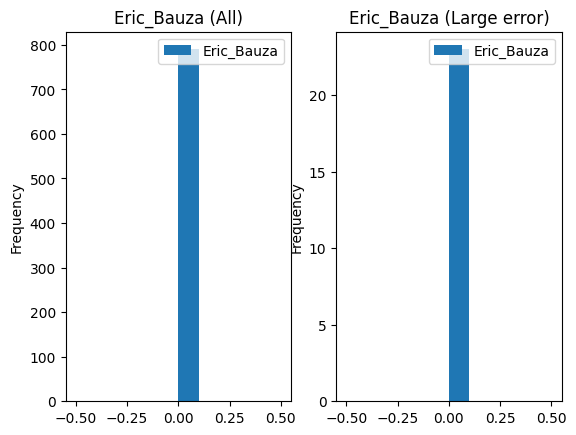

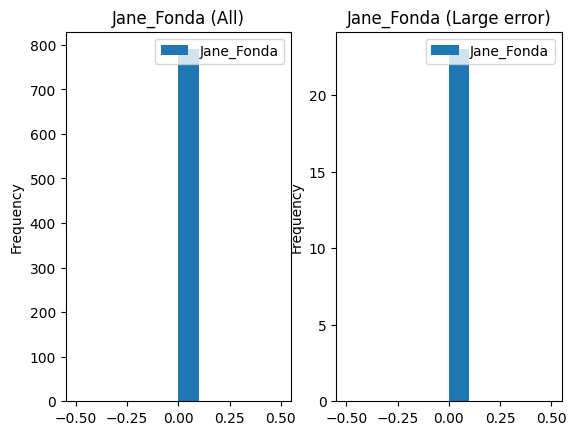

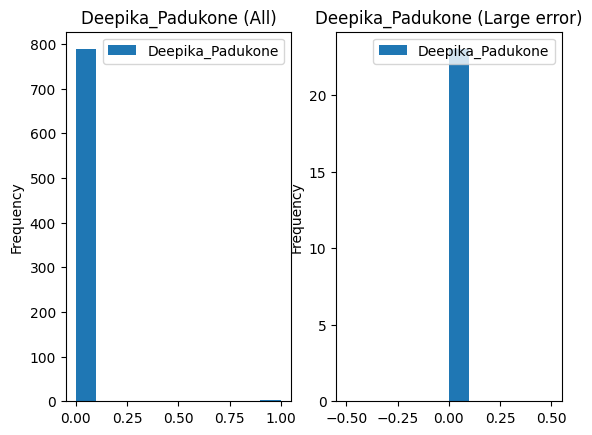

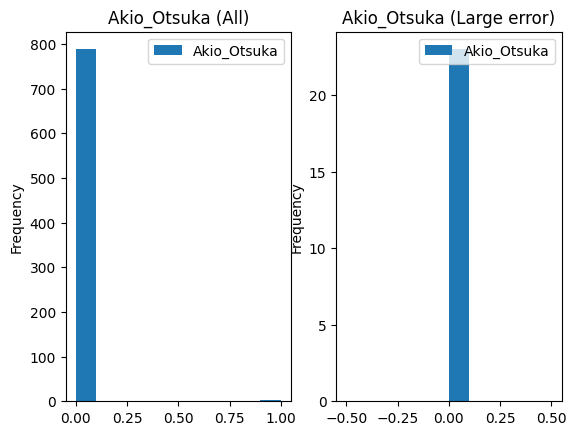

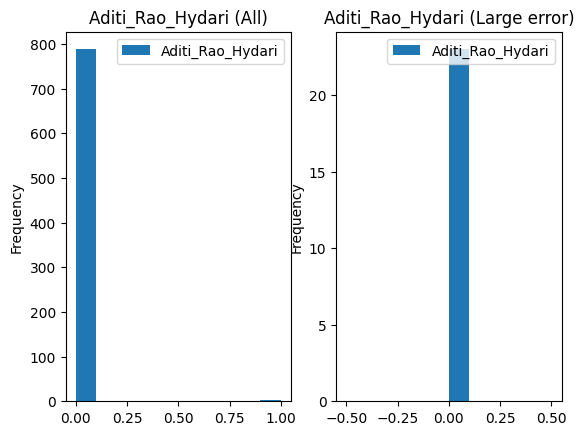

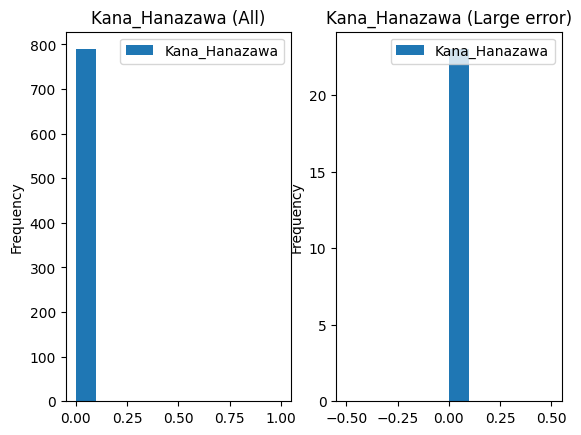

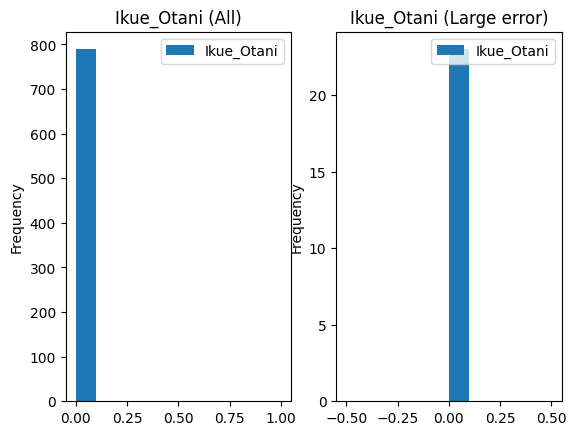

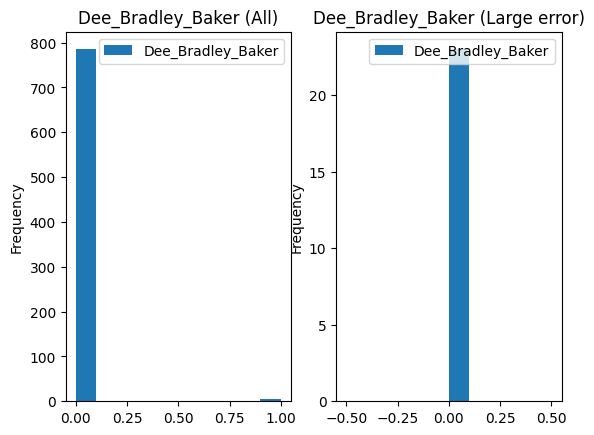

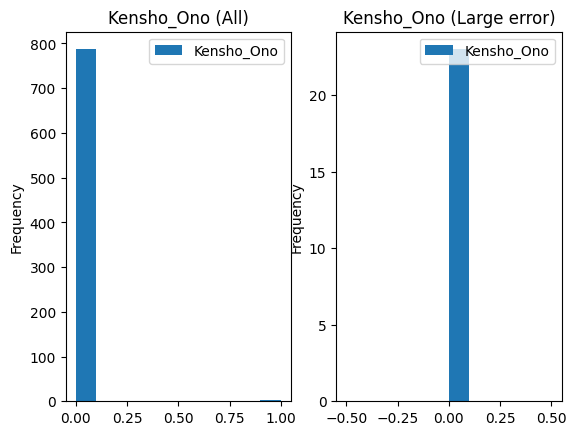

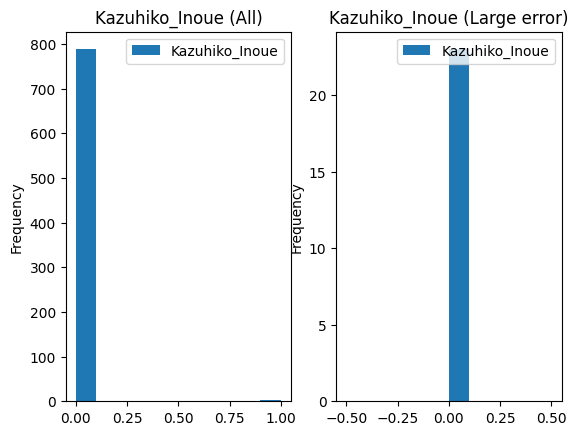

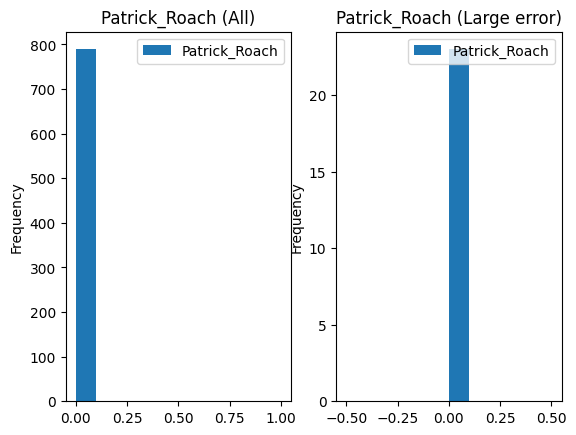

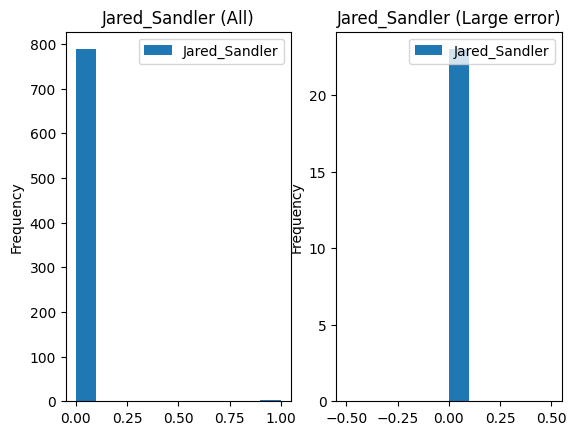

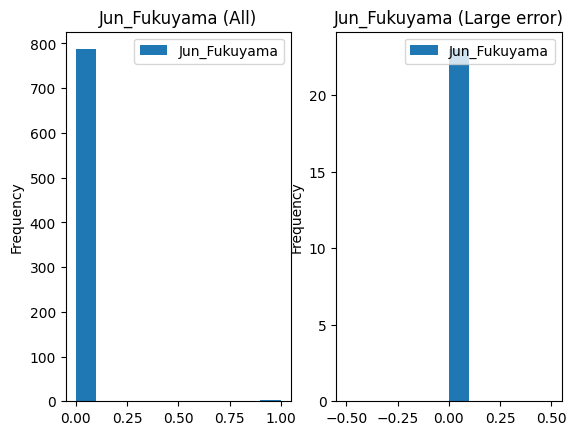

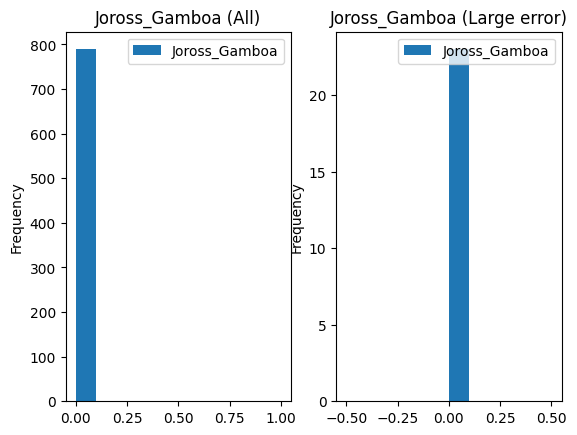

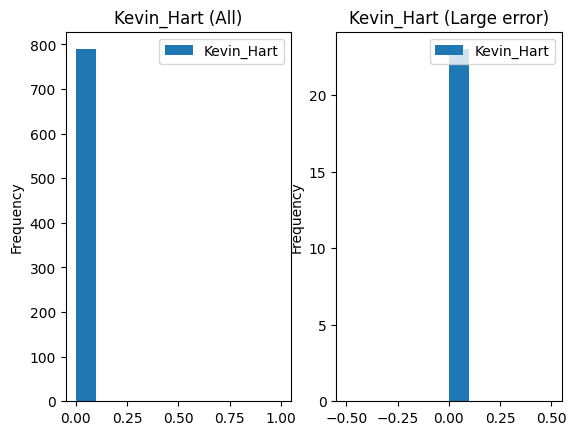

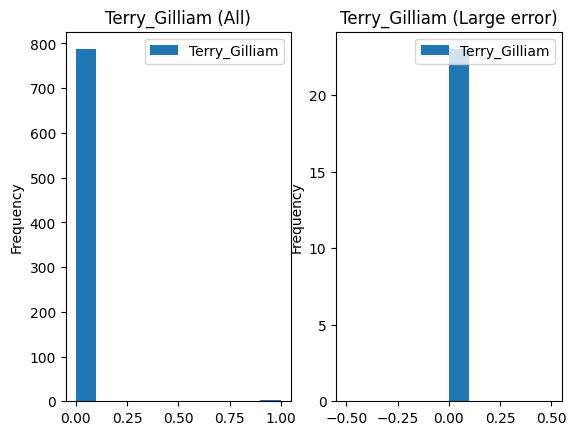

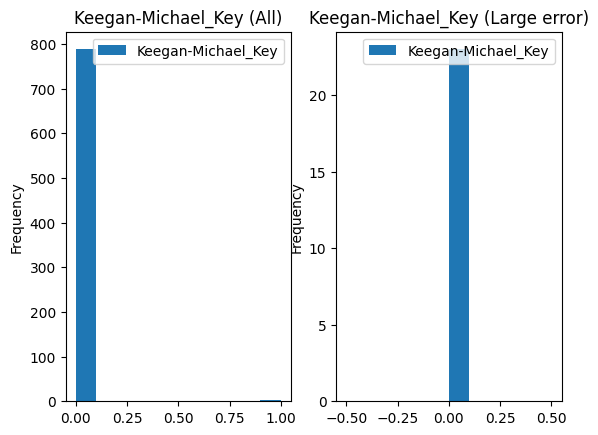

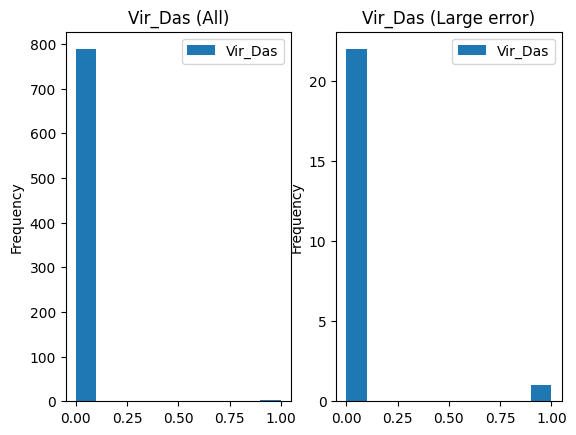

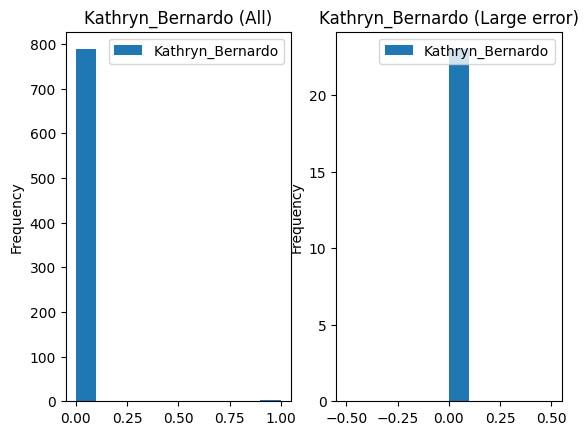

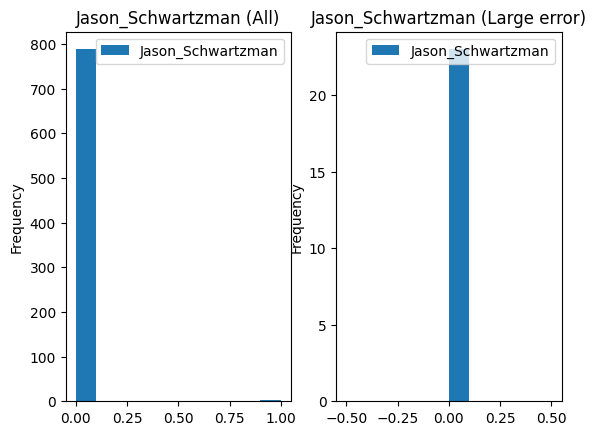

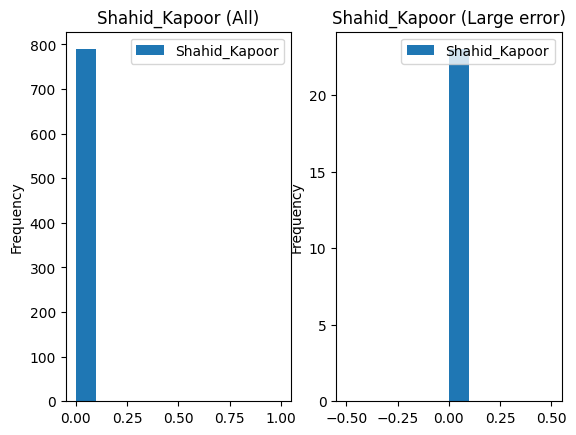

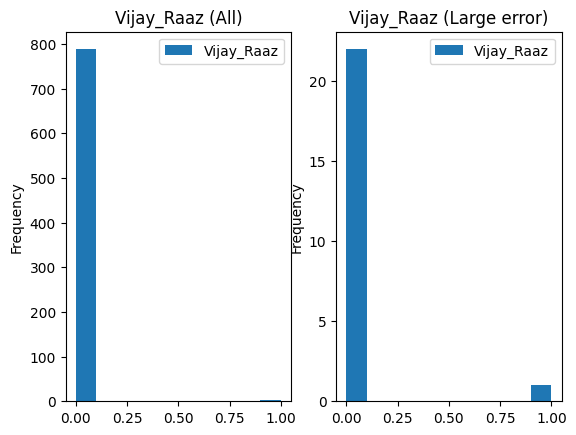

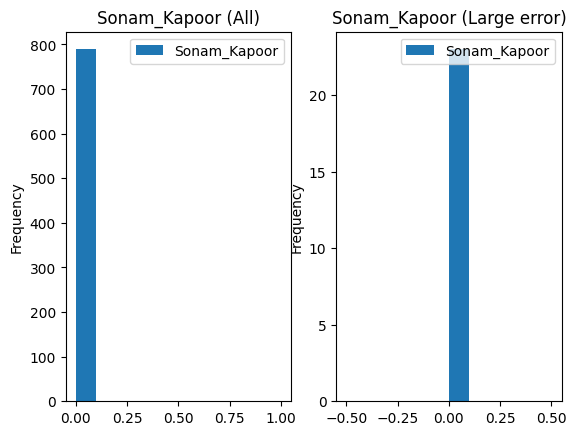

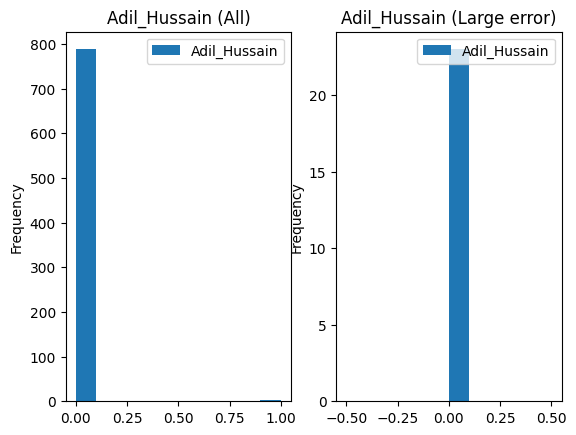

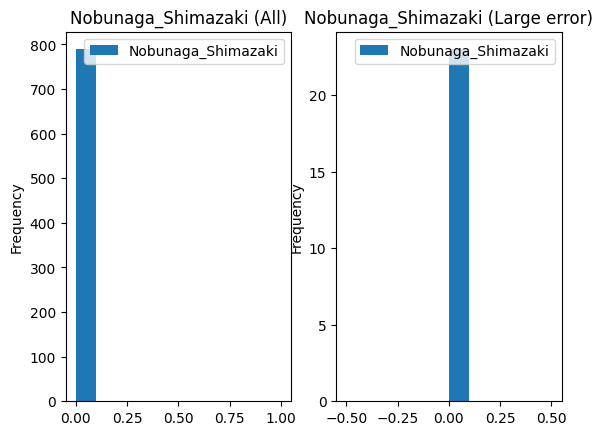

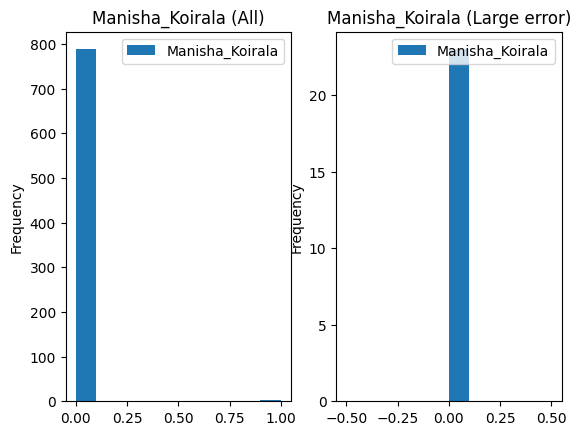

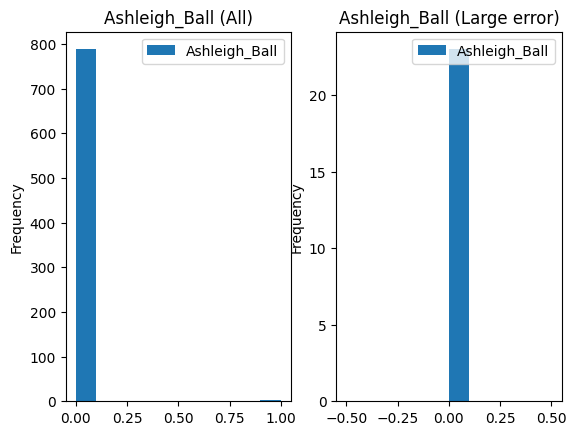

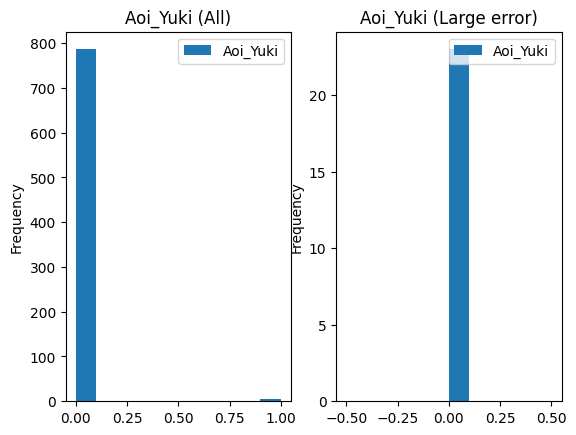

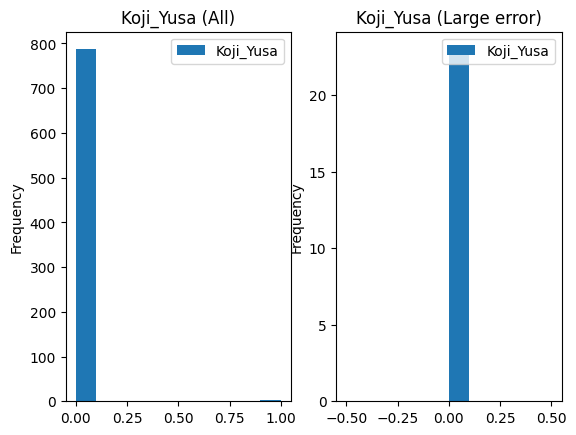

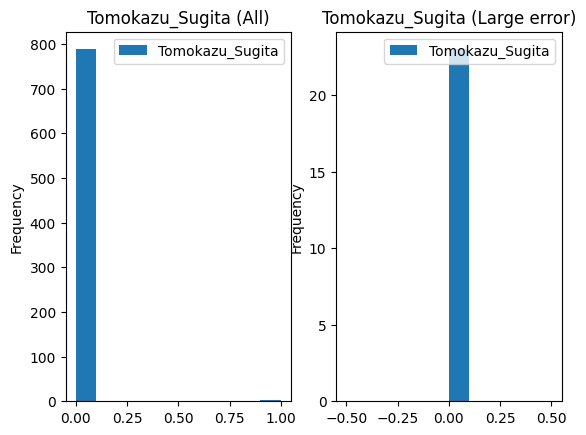

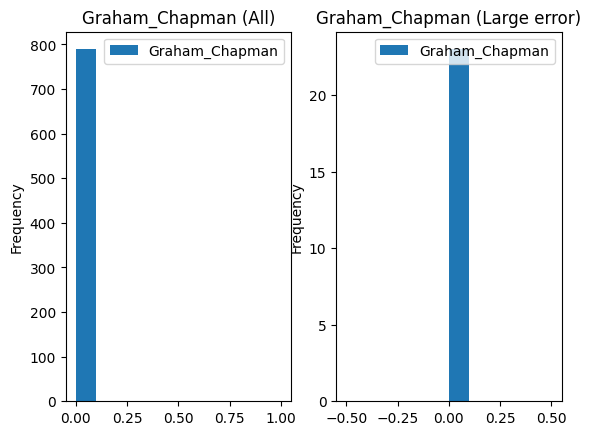

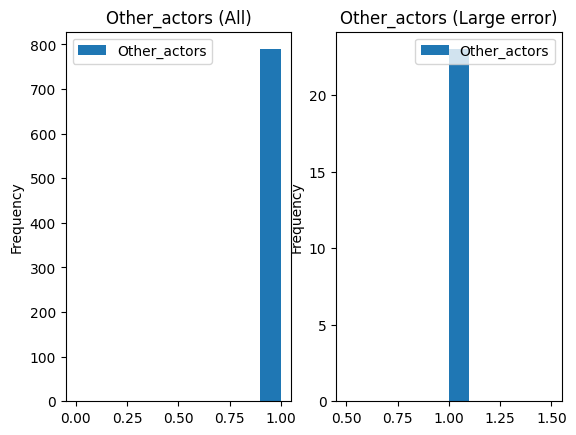

In [ ]:
#Erneut erkennen wir, das unser Modell mittelmäßig gut performt, wir möchten uns die Fehler größer als 2 genauer ansehen

for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  df_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  df_with_predictions[df_with_predictions.pred_diff > 2].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)

Wir sehen, dass unser Modell Probleme damit hat Filme mit einer langen Runtime (120 Min) richtig vorherzusagen. Außerdem hat es Probleme mit einigen Genres (z.B. romance und drama) oder Ländern (z.B. IT)

Betrachten wir noch den Unterschied zwischen den vorhergesagten und tatsächlichen Werte

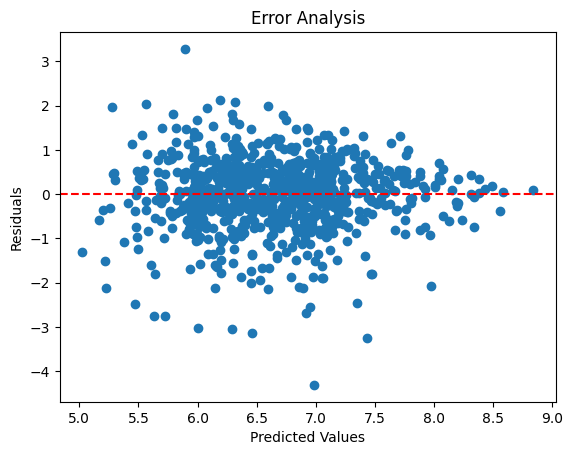

           Actual   Predicted   Residuals
count  790.000000  790.000000  790.000000
mean     6.638781    6.656578   -0.017797
std      1.062946    0.647845    0.828236
min      2.675000    5.025652   -4.311160
25%      5.950000    6.178489   -0.421563
50%      6.725000    6.641839    0.041312
75%      7.375000    7.078837    0.489141
max      9.175000    8.837887    3.283593


In [ ]:
y_pred = best_gbr.predict(X_test)

# Fehleranalyse
residuals = y_test - y_pred
error_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})

# Plotten der Fehleranalyse
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Error Analysis')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontale Linie bei Residuals=0
plt.show()


# Statistiken der Fehleranalyse
error_stats = error_df.describe()
print(error_stats)

Das Modell sagt das Minimum deutlich höher vorher den Maxium jedoch niedriger. Insgesamt sieht die Performance nicht zu schlecht aus, wir müssen aber beachten das wir in unserem Modell wahrscheinlich Overfitting vorliegen haben.

#Modell 2 mit standardisierten Daten

Für Gradient Boosting müssen die Daten nicht zwangsläufig standardisiert werden, dennoch möchten wir testen ob es einen Einfluss auf unsere Modellgüte hat. Wir verwenden dafür die Parameter, die bei dem Hyperparameter Tuning als optimal herausgefunden wurden.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [ ]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [ ]:
#Wir tranieren das Modell erneut mit den scalierten Daten und unseren optimalen Parametern

#{'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01}

gbr_sc = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5)

gbr_sc.fit(X_train, y_train)

evaluate(gbr_sc, X_test_sc, y_test_sc)

R2: -0.25693156879714896
MAE: 0.9205960869721286
MSE: 1.4183526578287657
RMSE: 1.1909461187764818
MAPE: 0.15473311359351954


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Wir sehen, das unser Modell mit den standardisierten Daten sehr schlecht performt. Daher tranieren wir dieses Modell nicht weiter.